In [29]:
import os
import pandas as pd
import sidetable
import numpy as np
import openpyxl
import dataframe_image as dfi
from pathlib import Path
import matplotlib.pyplot as plt
import textwrap
import csv
import sys
import getopt
import time
import datetime
import random
import calendar
from datetime import timedelta
from calendar import monthrange
from matplotlib import rcParams
from matplotlib import font_manager
from dateutil.rrule import rrule, MONTHLY
import warnings
import bisect
import drawsvg as draw
warnings.filterwarnings('ignore')

In [30]:
#####################
# SET CURRENT YEAR
#####################
currentyear = "2023"

#####################
# SET CURRENT MONTH
#####################
currentmonth = 6

###############
# SET USERNAME
###############
username = "HANDMADEPHD"

In [31]:
###############
# SYSTEM FONT
###############
rcParams["font.family"] = "Patrick Hand"
rcParams.update({"font.size": 40})

####################
# COLOR SCHEME
####################
# "blue", "red", "pink", "green", "yellow", "lavender"
clrs = ["#1B5EC9", "#FF5501", "#FFC5DE", "#31D2A1", "#FFC701", "#DCCFFF"]
clrs_txt = {'#1B5EC9': "#FFFFFF",
            '#FF5501': "#FFFFFF", 
            "#FFC5DE": "#000000", 
            "#31D2A1": "#FFFFFF", 
            "#FFC701": "#000000", 
            "#DCCFFF": "#000000",
            "white": "black",
            "tab:blue": "white",
            "tab:orange": "white",
            "tab:gray": "black",
            "tab:green": "white",
            "tab:brown": "white",
            "tab:pink": "white",
            "tab:purple": "white",
            "tab:red": "white",
            "whitesmoke": "black",
            "gold": "black"}

#########
# DATES
#########
# START OF THE YEAR
strt_dt = currentyear + "-01"

# CURRENT MONTH
end_dt = currentyear + "-" + "{:02d}".format(currentmonth)

# LIST OF MONTHS SO FAR THIS YEAR
month_list = pd.date_range(strt_dt, end_dt, freq='MS').strftime("%b").tolist()
month_list = [w.upper() for w in month_list]

# NUMBER OF DAYS THIS YEAR
days = 0
for m in range(len(month_list)):
    days = days + monthrange(2023, m+1)[1]

# NAME OF THIS MONTH
month = calendar.month_abbr[currentmonth]

# LABEL FOR FIGURES
month_label = currentyear + " " + month.upper() + " RECAP"

In [32]:
##############################
# FUNCTIONS AND DICTIONARIES
##############################
def custom_label(names):
    labels = list(names)
    global wrapped_labels
    wrapped_labels = []
    for text in labels:
        wrapped_labels.append(textwrap.fill(text, width=10, break_long_words=False))
        
    return(wrapped_labels)
        
def custom_wedges():
    tempList = random.sample(clrs, 6)
    global colors
    colors = []
    for i in range(len(wrapped_labels)):
        if i <= 5:
            colors.append(tempList[i])
        elif i >= 6:
            colors.append(tempList[i-6])
    
    return(colors)
            
def custom_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 5 else ''

def custom_autopct_percent(pct):
    return ('%1.1f%%' % pct) if pct > 5 else ''

def custom_autopct_count(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    # return f"{absolute:d}\n({pct:.1f}%)"
    return f"{absolute:d}"

def custom_money_piechart():
    pctscolors = [clrs_txt[k] for k in colors]
    fig, ax = plt.subplots(figsize=(18, 15), dpi=100)
    wedges, texts, pcts = ax.pie(tab["percent"], colors=colors, wedgeprops={"linewidth": 10, "edgecolor": "#E2EDFF"}, autopct=custom_autopct, pctdistance=0.825, startangle=random.randint(0, 360))
    for pct, color in zip(pcts, pctscolors):
        pct.set_color(color)
        
    kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center")
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(wrapped_labels[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.1*y), horizontalalignment=horizontalalignment, **kw)
        
    center_circle = plt.Circle((0, 0), 0.65, color="#E2EDFF")
    fig.gca().add_artist(center_circle)
    plt.text(0, 0, "${}".format(tab_total), ha="center", va="center", fontsize=100)
    fig.set_facecolor("#E2EDFF")
    plt.subplots_adjust(top=0.85)
    plt.text(0.02, 0.02, username, fontsize=42, transform=plt.gcf().transFigure)
    plt.text(0.78, 0.02, month_label, fontsize=42, transform=plt.gcf().transFigure)

def custom_project_piechart():
    pctscolors = [clrs_txt[k] for k in colors]
    fig, ax = plt.subplots(figsize=(18, 15), dpi=100)
    wedges, texts, pcts = ax.pie(tab["percent"], colors=colors, wedgeprops={"linewidth": 10, "edgecolor": "#E2EDFF"}, autopct=custom_autopct, pctdistance=0.825, startangle=random.randint(0, 360))
    for pct, color in zip(pcts, pctscolors):
        pct.set_color(color)
        
    kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center")
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(wrapped_labels[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.1*y), horizontalalignment=horizontalalignment, **kw)
        
    center_circle = plt.Circle((0, 0), 0.65, color="#E2EDFF")
    fig.gca().add_artist(center_circle)
    plt.text(0, 0, "{}".format(tab_total), ha="center", va="center", fontsize=150)
    fig.set_facecolor("#E2EDFF")
    plt.subplots_adjust(top=0.85)
    plt.text(0.02, 0.02, username, fontsize=42, transform=plt.gcf().transFigure)
    plt.text(0.78, 0.02, month_label, fontsize=42, transform=plt.gcf().transFigure)

def custom_time_piechart():
    pctscolors = [clrs_txt[k] for k in colors]
    fig, ax = plt.subplots(figsize=(18, 15), dpi=100)
    wedges, texts, pcts = ax.pie(tab["percent"], colors=colors, wedgeprops={"linewidth": 10, "edgecolor": "#E2EDFF"}, autopct=custom_autopct, pctdistance=0.825, startangle=random.randint(0, 360))
    for pct, color in zip(pcts, pctscolors):
        pct.set_color(color)
        
    kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center")
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(wrapped_labels[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.1*y), horizontalalignment=horizontalalignment, **kw)
        
    center_circle = plt.Circle((0, 0), 0.65, color="#E2EDFF")
    fig.gca().add_artist(center_circle)
    plt.text(0, 0, "{}".format(tab_total), ha="center", va="center", fontsize=150)
    fig.set_facecolor("#E2EDFF")
    plt.subplots_adjust(top=0.85)
    plt.text(0.02, 0.02, username, fontsize=42, transform=plt.gcf().transFigure)
    plt.text(0.78, 0.02, month_label, fontsize=42, transform=plt.gcf().transFigure)
    
def monthly_piechart():
    for pct, color in zip(pcts, pctscolors):
        pct.set_color(color)
        
    kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center")
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(wrapped_labels[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.1*y), horizontalalignment=horizontalalignment, **kw)

    center_circle = plt.Circle((0, 0), 0.65, color="#E2EDFF")
    fig.gca().add_artist(center_circle)
    fig.set_facecolor("#E2EDFF")
    plt.subplots_adjust(top=0.85)
    plt.text(0.02, 0.02, username, fontsize=42, transform=plt.gcf().transFigure)
    plt.text(0.78, 0.02, month_label, fontsize=42, transform=plt.gcf().transFigure)

def secondsToTime(seconds):
    minutes, seconds = divmod(seconds, 60)
    hours, minutes = divmod(minutes, 60)
    return "%d:%02d" % (hours, minutes)

def sew_interval(x):
    intvals = [0, 3600*2, 3600*4, 3600*6, 3600*8, 3600*10, 3600*12, 3600*14, 3600*16, 3600*18, 3600*20]
    i = bisect.bisect_right(intvals,x)
    return intvals[0:i+1]

def knit_interval(x):
    intvals = [0, 3600*5, 3600*10, 3600*15, 3600*20, 3600*25, 3600*30, 3600*35, 3600*40]
    i = bisect.bisect_right(intvals,x)
    return intvals[0:i+1]

time = {
    0: "00:00",
    7200: "02:00",
    14400: "04:00",
    18000: "05:00",
    21600: "06:00",
    28800: "08:00",
    36000: "10:00",
    43200: "12:00",
    50400: "14:00",
    54000: "15:00",
    57600: "16:00",
    64800: "18:00",
    72000: "20:00",
    90000: "25:00",
    108000: "30:00",
    126000: "35:00"
}

In [33]:
################
# TITLE FIGURE
################
len_x = 960
len_y = 800

cx = len_x / 2
cy = len_y / 2

# Begin drawing
s0 = draw.Drawing(len_x, len_y, origin=(0, 0), displayInline=False)
s0.embed_google_font('Patrick Hand', text=set('ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789.@')) # Set font and characters

# Draw background
s0.append(draw.Rectangle(0, 0, len_x, len_y, fill='#E2EDFF'))

# Select random colors
fill_clrs = random.sample(clrs, 4)
font_clrs = [clrs_txt[k] for k in fill_clrs]

# Draw rounded rectangle
s0.append(draw.Rectangle(-160, 0, 960, 200, rx='100', stroke='none', fill=fill_clrs[0]))
s0.append(draw.Rectangle(160, 200, 960, 200, rx='100', stroke='none', fill=fill_clrs[1]))
s0.append(draw.Rectangle(-160, 400, 960, 200, rx='100', stroke='none', fill=fill_clrs[2]))
s0.append(draw.Rectangle(160, 600, 960, 200, rx='100', stroke='none', fill=fill_clrs[3]))

# Draw text
s0.append(draw.Text('2023', 200, 400, 95, fill=font_clrs[0], text_anchor='middle', dominant_baseline='middle', font_family='Patrick Hand'))
s0.append(draw.Text(calendar.month_name[currentmonth].upper(), 200, 575, 295, fill=font_clrs[1], text_anchor='middle', dominant_baseline='middle', font_family='Patrick Hand'))
s0.append(draw.Text('RECAP', 200, 400, 495, fill=font_clrs[2], text_anchor='middle', dominant_baseline='middle', font_family='Patrick Hand'))
s0.append(draw.Text(username, 125, 575, 695, fill=font_clrs[3], text_anchor='middle', dominant_baseline='middle', font_family='Patrick Hand'))

# Set pixel scale
s0.set_render_size(len_x, len_y)

# Display in Jupyter notebook
s0.rasterize()  # Display as PNG
s0.save_png('title.png')

In [34]:
##########################
# LOAD SPENT DATASHEET
##########################
df = pd.read_excel(r"../2023-recap.xlsx", sheet_name="SPENT", parse_dates=["DATE"])
df = df[(df["DATE"].dt.strftime("%Y-%m") >= strt_dt) & (df["DATE"].dt.strftime("%Y-%m") <= end_dt)]

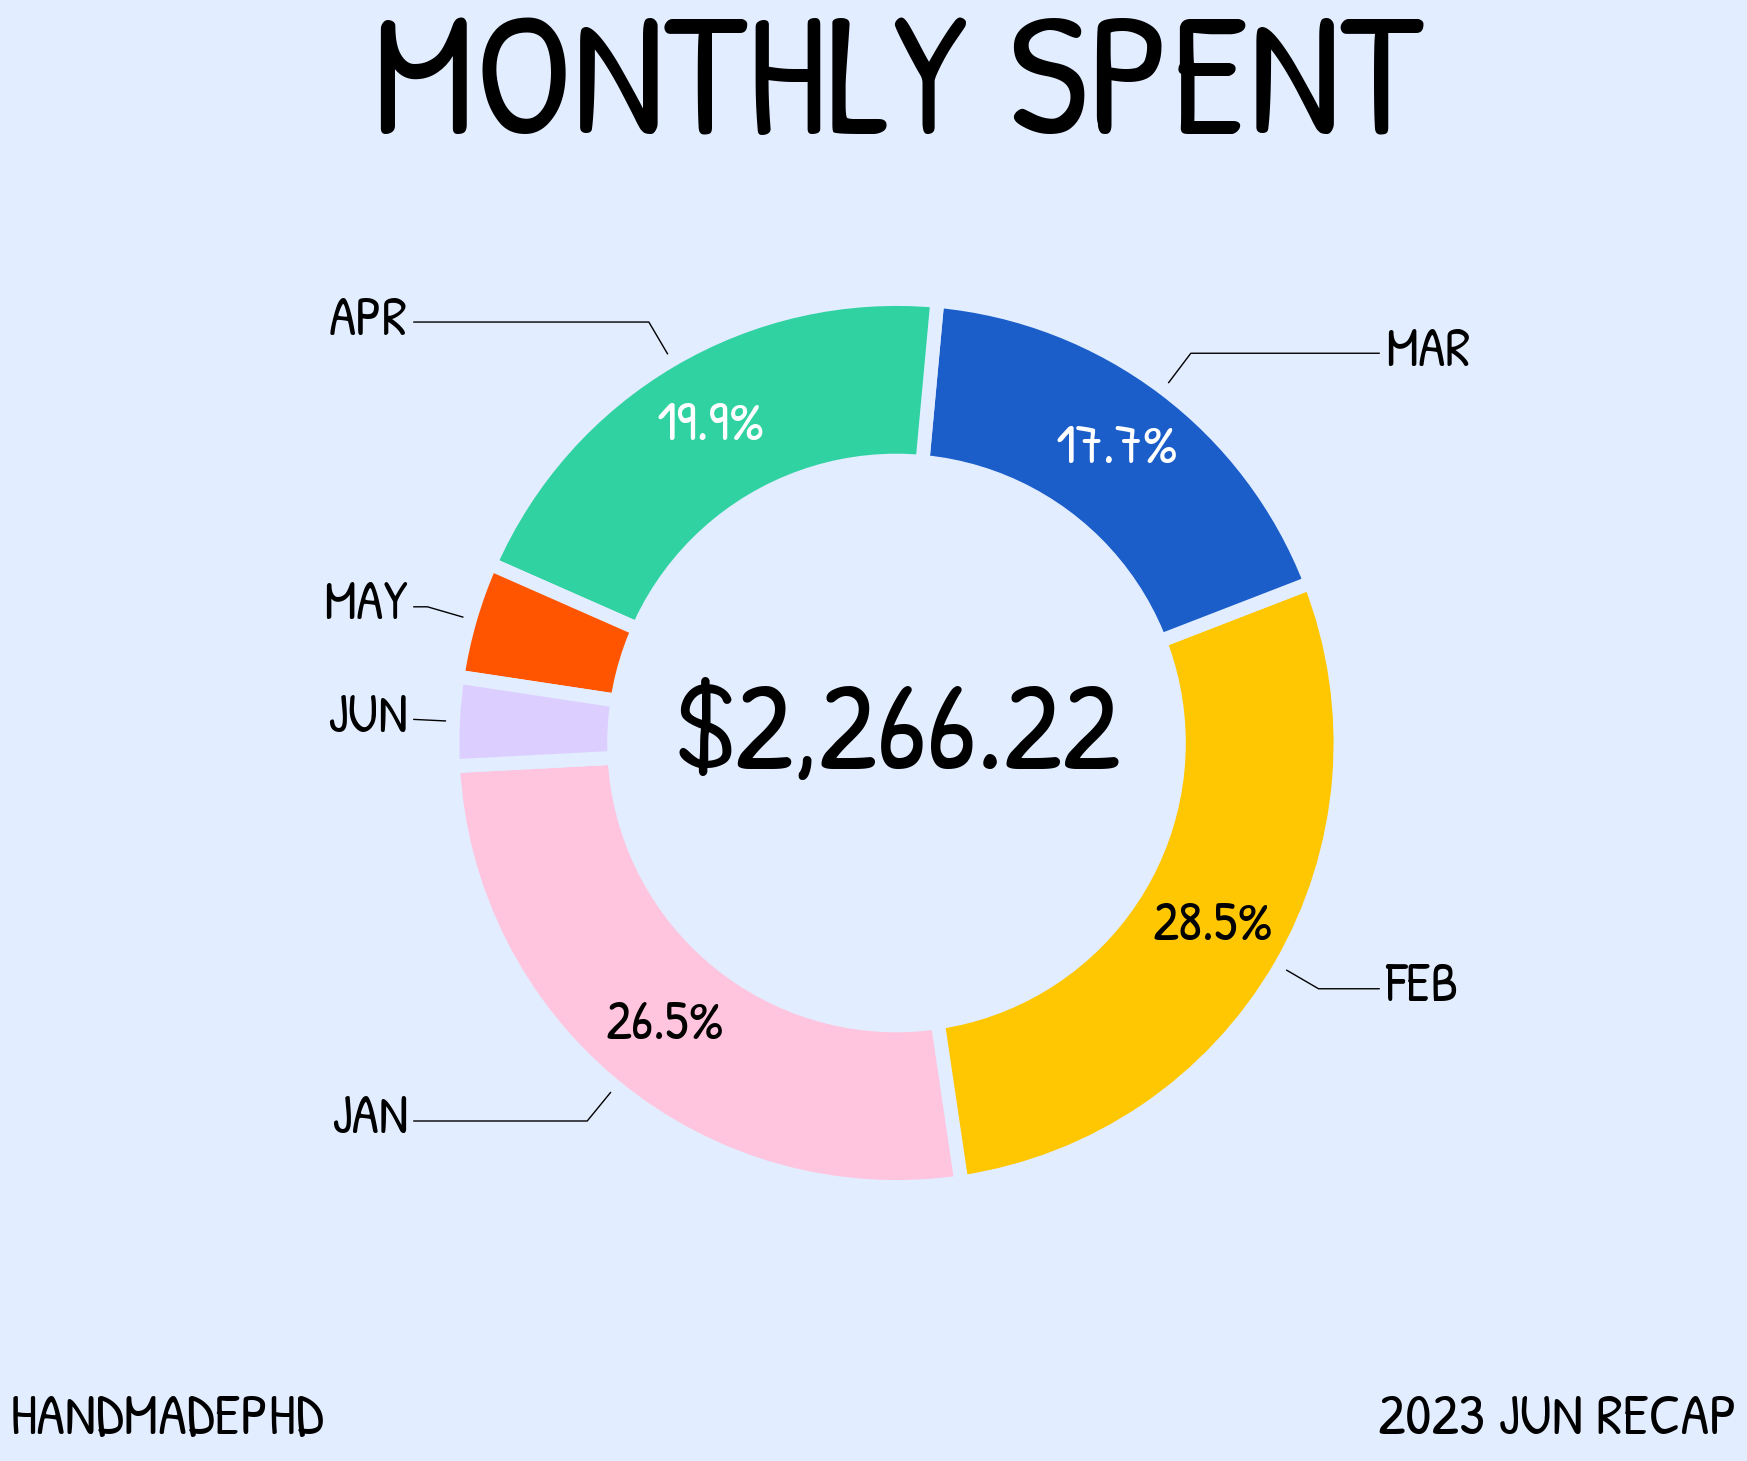

In [35]:
###############
# MONTLY SPENT
###############
months = [g for n, g in df.groupby(pd.Grouper(key='DATE',freq='M'))]
tab_total = []
for i in range(len(months)):
    tab = months[i].stb.freq(["CATEGORY"], value="COST")
    tab_total.append(round(sum(tab["COST"]), 2))

wrapped_labels = month_list
custom_wedges()

# PLOT
pctscolors = [clrs_txt[k] for k in colors]
fig, ax = plt.subplots(figsize=(18, 15), dpi=100)
wedges, texts, pcts = ax.pie(tab_total, colors=colors, wedgeprops={"linewidth": 10, "edgecolor": "#E2EDFF"}, autopct=custom_autopct_percent, pctdistance=0.825, startangle=random.randint(0, 360))
monthly_piechart()
plt.text(0, 0, "${:,.2f}".format(sum(tab_total)), ha="center", va="center", fontsize=90)

# SAVE FIGURE
plt.title("MONTHLY SPENT", fontsize=125, loc="center")
plt.savefig("monthly-spent.png", dpi=53.35)
plt.show()

In [36]:
##########################
# UPDATE SPENT DATASHEET
##########################
df = df[df["DATE"] .dt.strftime("%Y-%m") == end_dt]

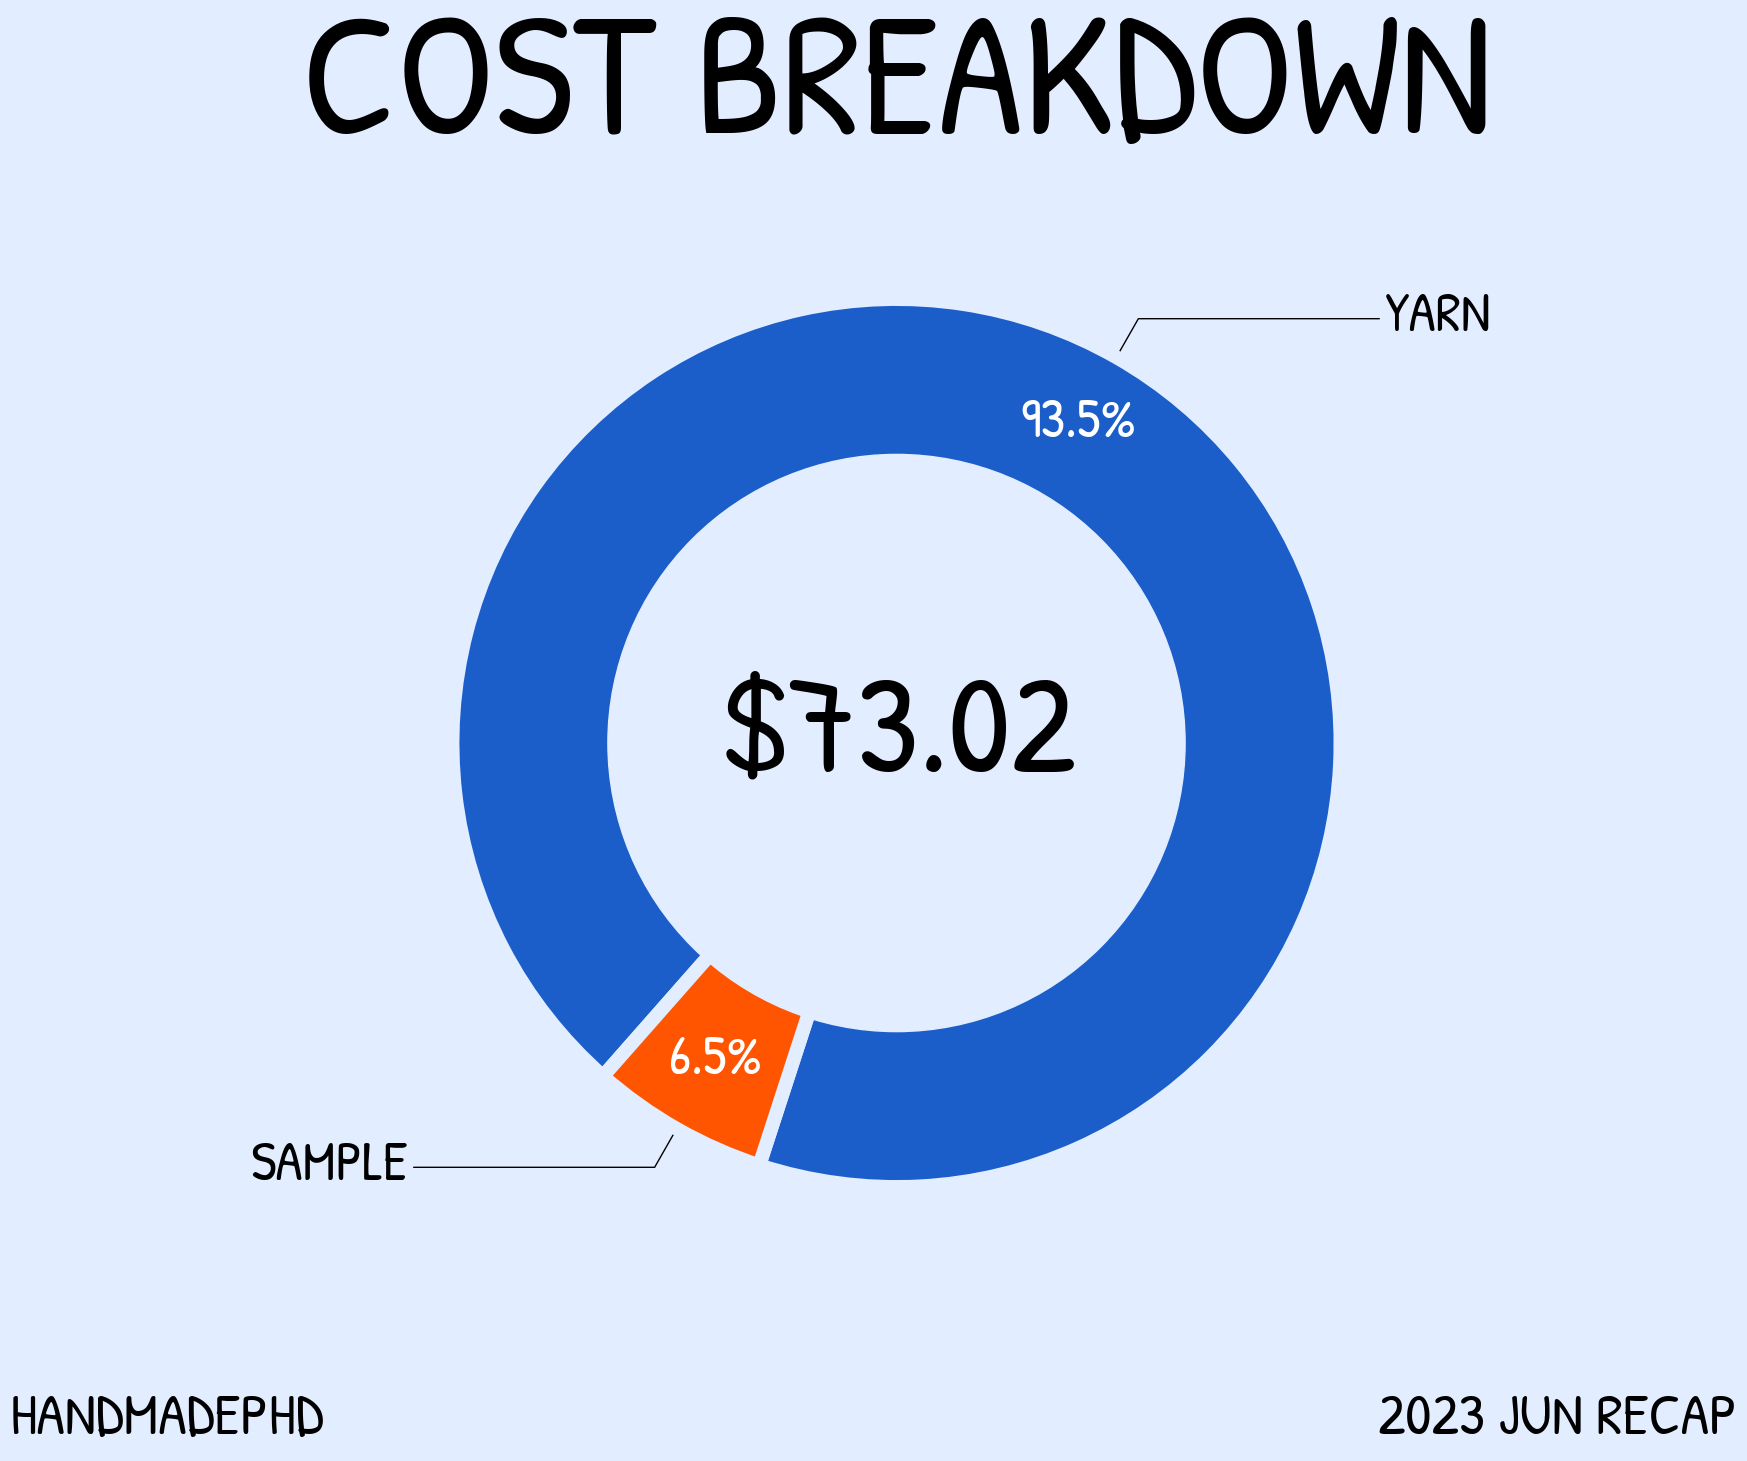

In [40]:
########
# COST
########
var = "CATEGORY"
tab = df.stb.freq([var], value="COST")
tab_total = round(sum(tab["COST"]), 2)

custom_label(tab[var])
custom_wedges()
custom_money_piechart()

# SAVE FIGURE
plt.title("COST BREAKDOWN", fontsize=125, loc="center")
plt.savefig("cost-breakdown.png", dpi=53.35)
plt.show()

In [41]:
##########################
# LOAD PROJECT DATASHEET
##########################
df = pd.read_excel(r"../2023-recap.xlsx", sheet_name="PROJECTS")
df["MADE FOR"].replace(to_replace=["NAOMI"], value="ME", inplace=True)
df["MADE FOR"].replace(to_replace=["RYAN"], value="NOT ME", inplace=True)
df["MADE FOR"].replace(to_replace=["MARLYS"], value="NOT ME", inplace=True)
df["ARRIVED"] = df["ARRIVED"].astype("datetime64[ns]")
df["STARTED"] = df["STARTED"].astype("datetime64[ns]")
df["PROJECT COMPLETED"] = df["PROJECT COMPLETED"].astype("datetime64[ns]")
df = df[(df["PROJECT COMPLETED"].dt.strftime("%Y-%m") >= strt_dt) & (df["PROJECT COMPLETED"].dt.strftime("%Y-%m") <= end_dt)]

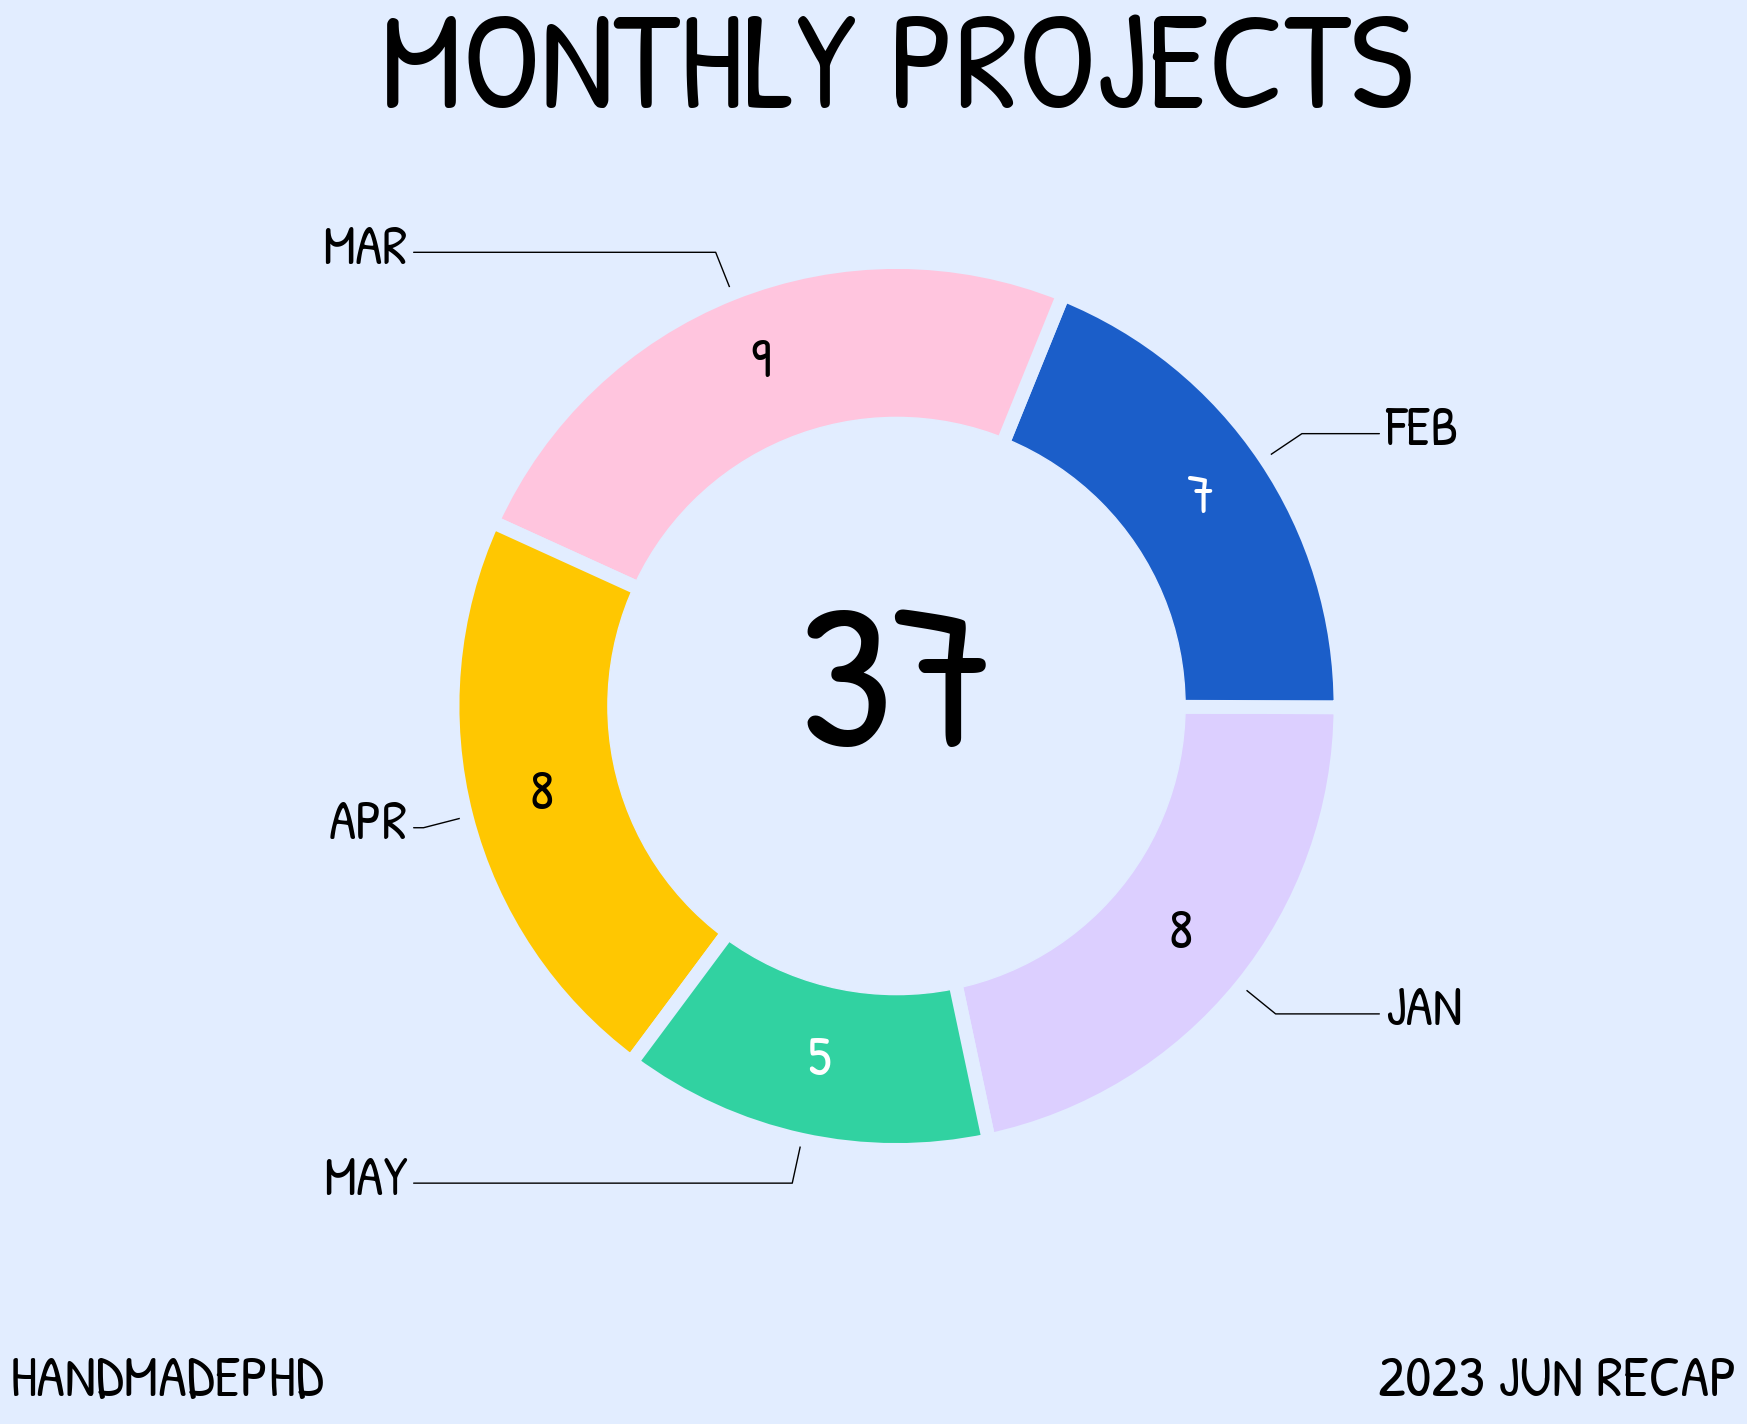

In [42]:
######################
# PROJECTS COMPLETED
######################
var = "METHOD"
months = [g for n, g in df.groupby(pd.Grouper(key='PROJECT COMPLETED',freq='M'))]
tab_total = []
for i in range(len(months)):
    tab = months[i].groupby(["PROJECT NAME"]).agg({var: "unique"}).reset_index()
    tab[var] = tab[var].str[0]
    tab = tab.stb.freq([var])
    tab_total.append(round(sum(tab["count"]),0))

# LABELS
wrapped_labels = month_list

# PLOT
custom_wedges()
pctscolors = [clrs_txt[k] for k in colors]
fig, ax = plt.subplots(figsize=(18, 15), dpi=100)
wedges, texts, pcts = ax.pie(tab_total, colors=colors, wedgeprops={"linewidth": 10, "edgecolor": "#E2EDFF"}, autopct=lambda pct: custom_autopct_count(pct, tab_total), pctdistance=0.825, startangle=random.randint(0, 360))
monthly_piechart()
plt.text(0, 0, "{}".format(sum(tab_total)), ha="center", va="center", fontsize=150)

# SAVE FIGURE
plt.title("MONTHLY PROJECTS", fontsize=100, loc="center")
plt.savefig("monthly-projects.png", dpi=53.35)
plt.show()

In [43]:
##########################
# UPDATE PROJECT DATASHEET
##########################
df = df[df["PROJECT COMPLETED"] .dt.strftime("%Y-%m") == end_dt]

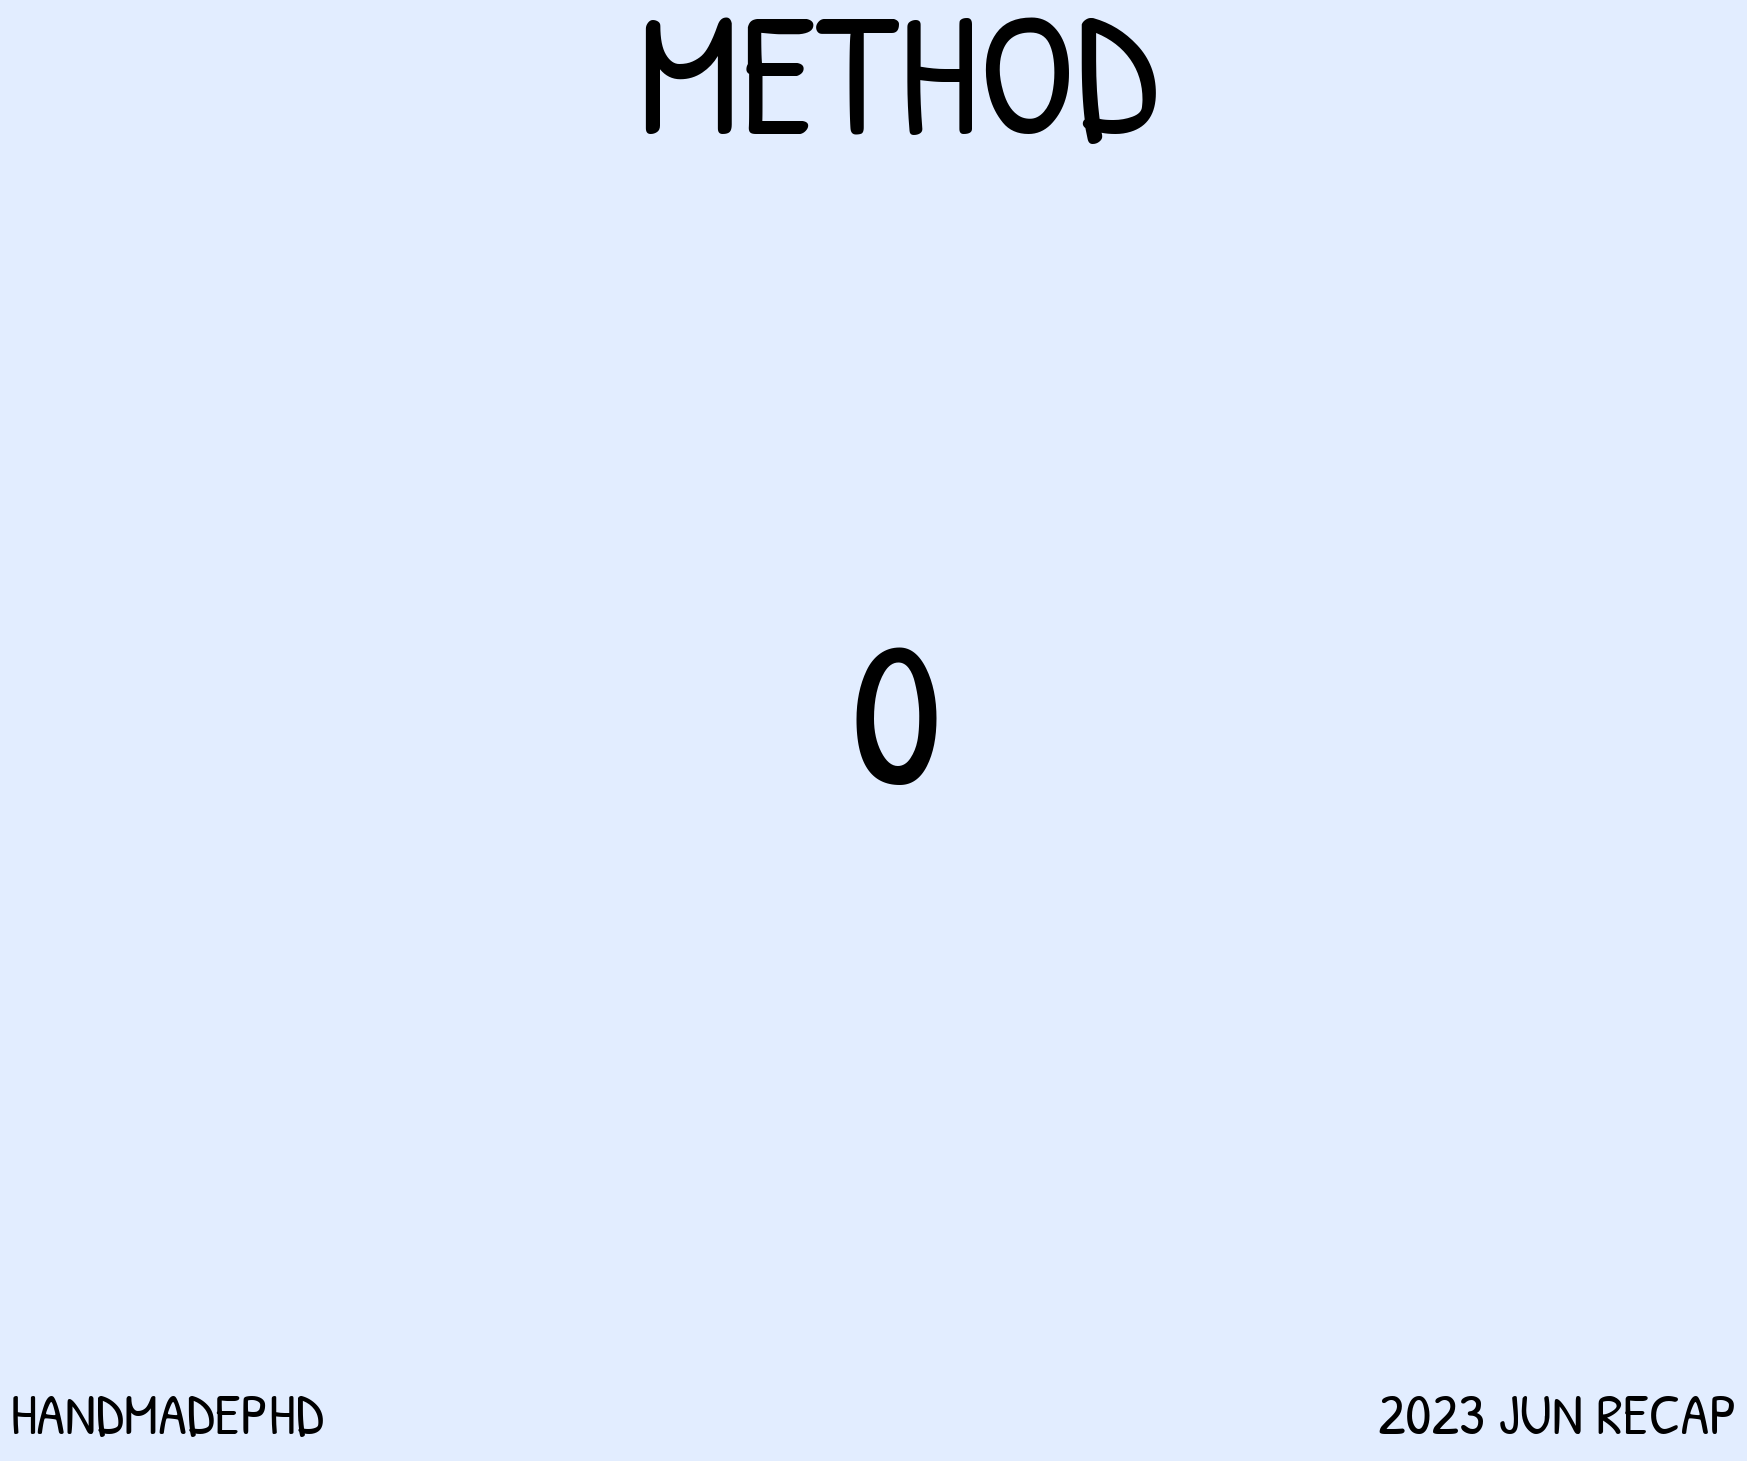

In [44]:
##########
# METHOD
##########
var = "METHOD"
tab = df.groupby(["PROJECT NAME"]).agg({var: "unique"}).reset_index()
tab[var] = tab[var].str[0]
tab = tab.stb.freq([var])
tab_total = round(sum(tab["count"]),0)

custom_label(tab[var])
custom_wedges()
custom_project_piechart()

# SAVE FIGURE
plt.title("METHOD", fontsize=125, loc="center")
plt.savefig("method.png", dpi=53.35)
plt.show()

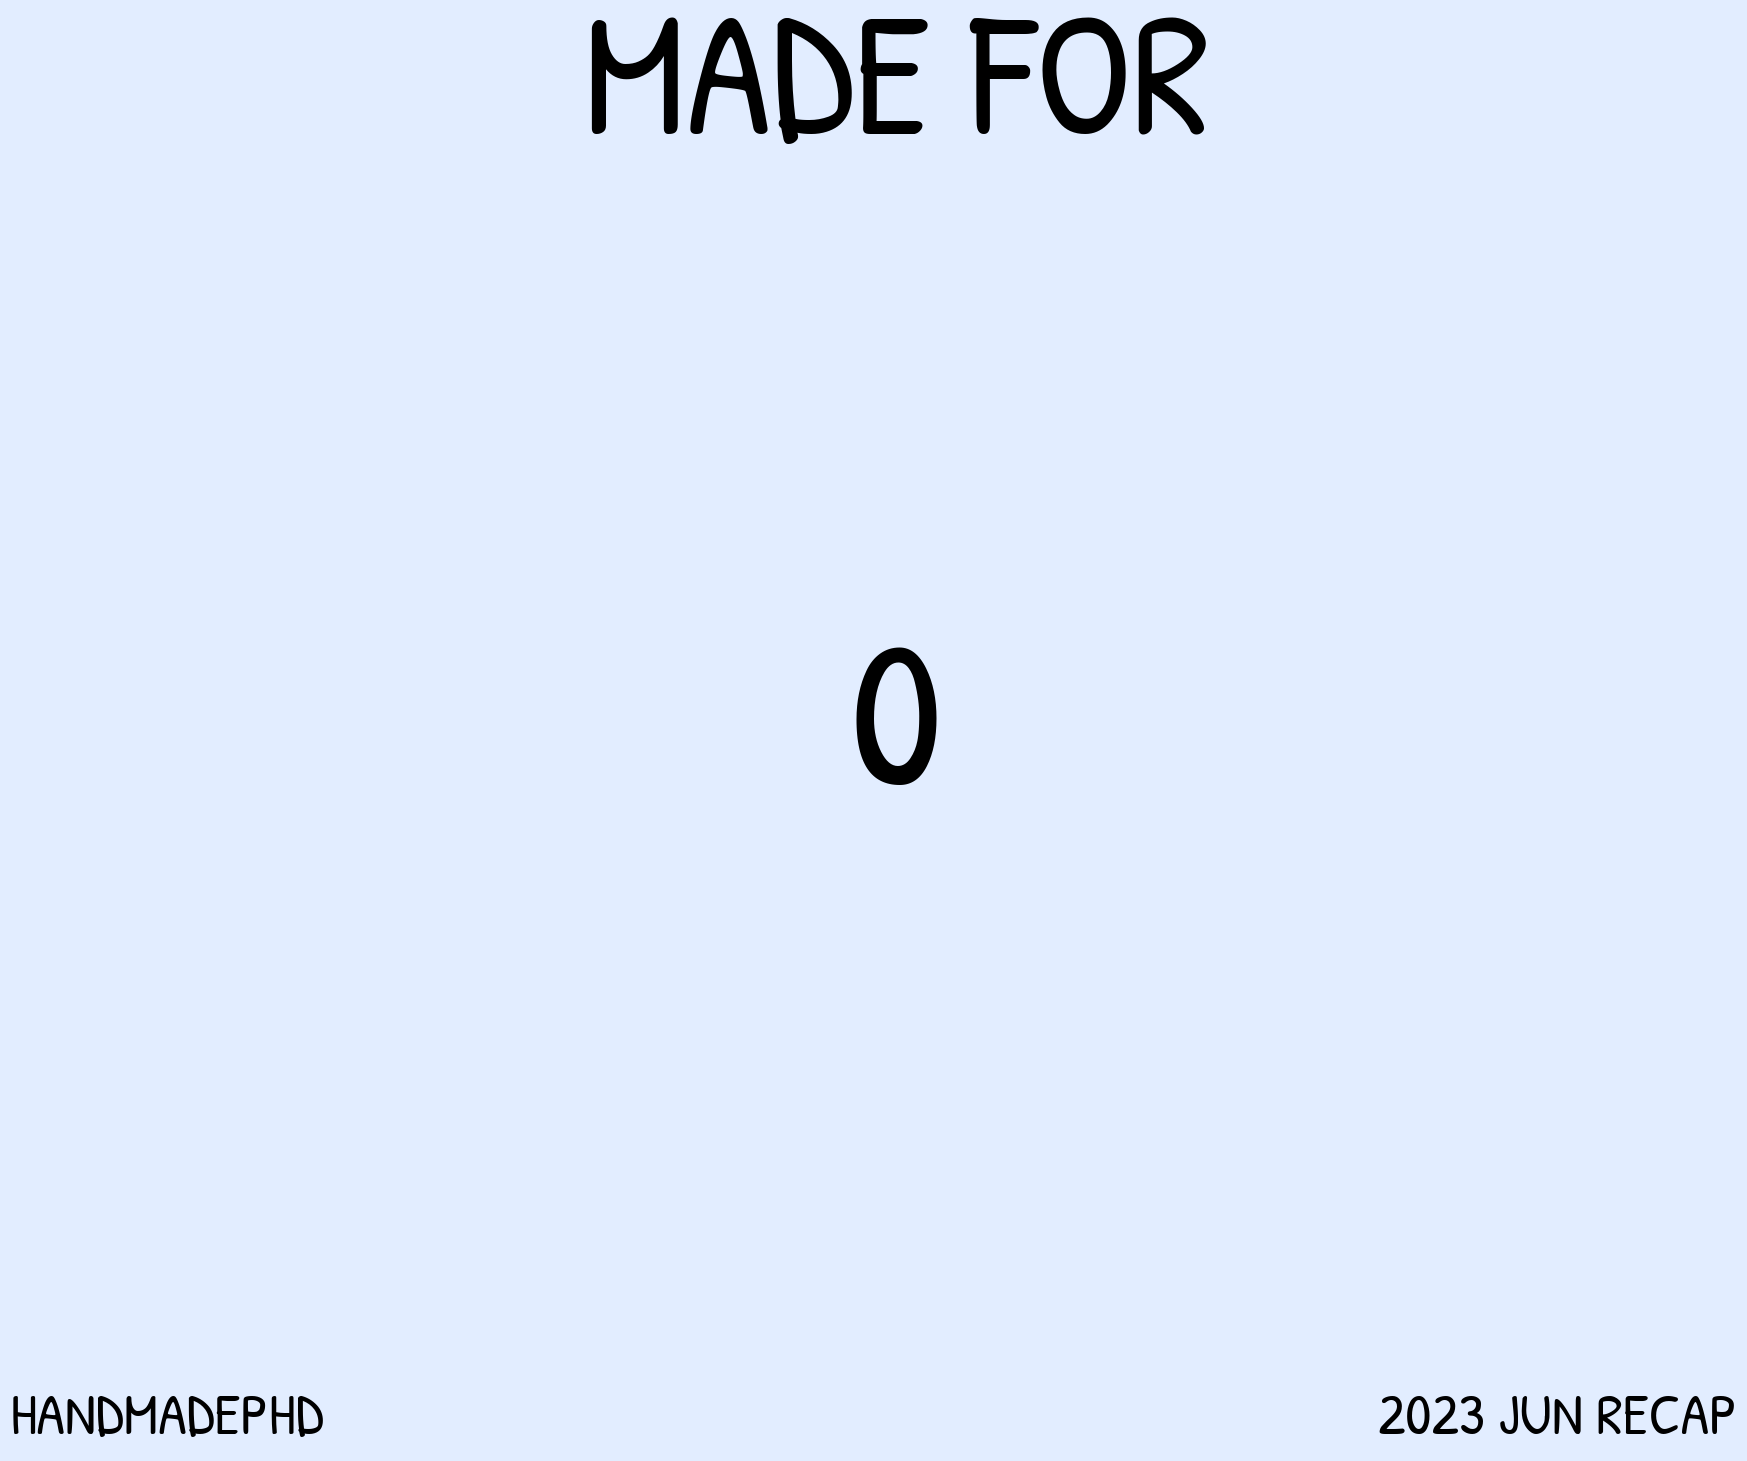

In [45]:
############
# MADE FOR
############
var="MADE FOR"
tab = df.groupby(["PROJECT NAME"]).agg({var: "unique"}).reset_index()
tab[var] = tab[var].str[0]
tab = tab.stb.freq([var])
tab_total = round(sum(tab["count"]),0)

custom_label(tab[var])
custom_wedges()
custom_project_piechart()

# SAVE FIGURE
plt.title("MADE FOR", fontsize=125, loc="center")
plt.savefig("made-for.png", dpi=53.35)
plt.show()

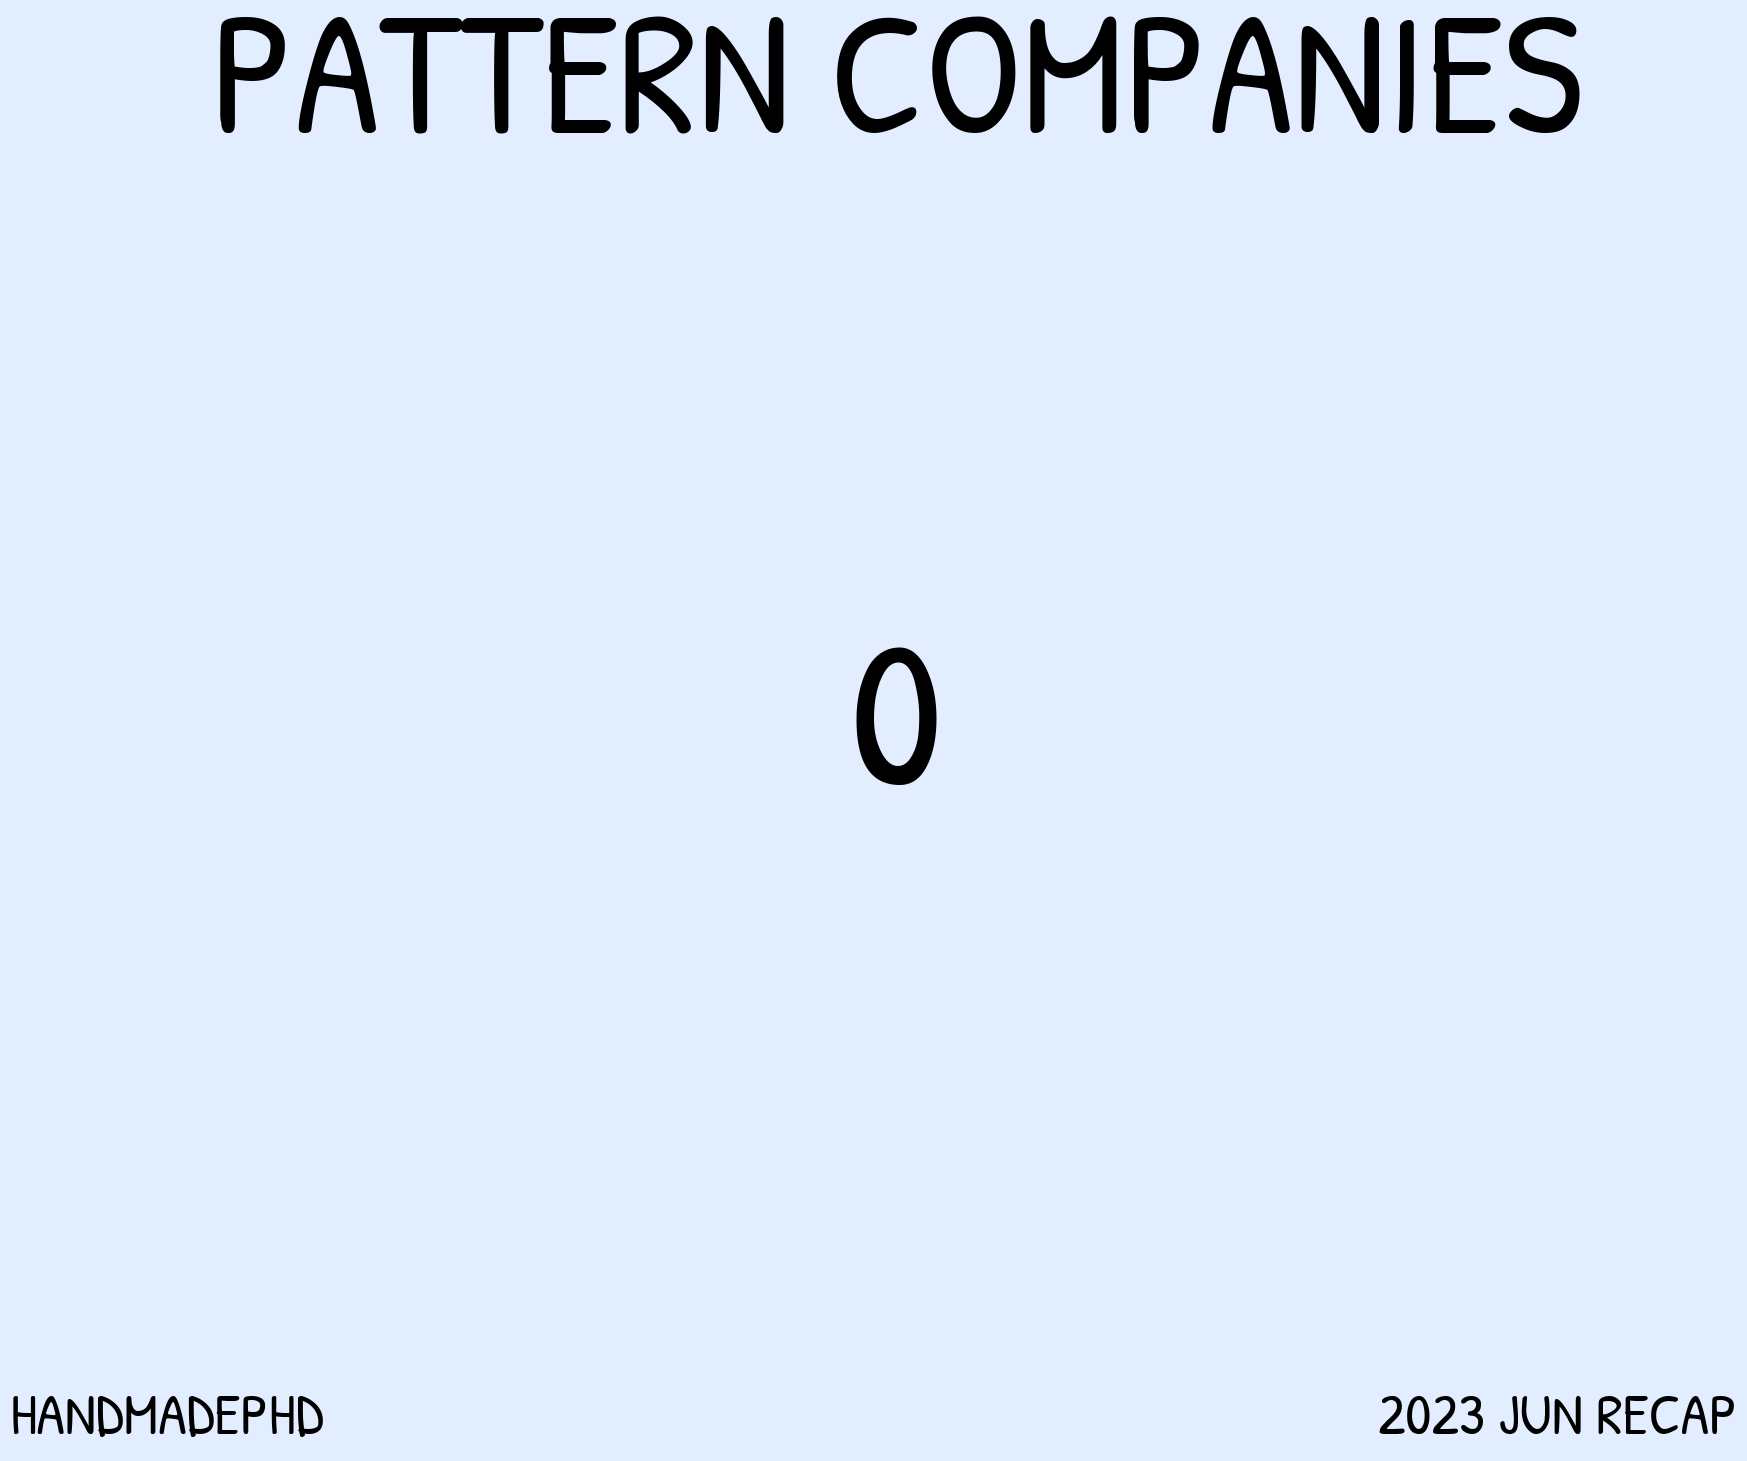

In [46]:
#####################
# PATTERN COMPANIES
#####################
var="PATTERN COMPANY"
tab = df.groupby(["PROJECT NAME"]).agg({var: "unique"}).reset_index()
tab[var] = tab[var].str[0]
tab = tab.stb.freq([var])
tab_total = round(sum(tab["count"]),0)

custom_label(tab[var])
custom_wedges()
custom_project_piechart()

# SAVE FIGURE
plt.title("PATTERN COMPANIES", fontsize=125, loc="center")
plt.savefig("pattern-companies.png", dpi=53.35)
plt.show()

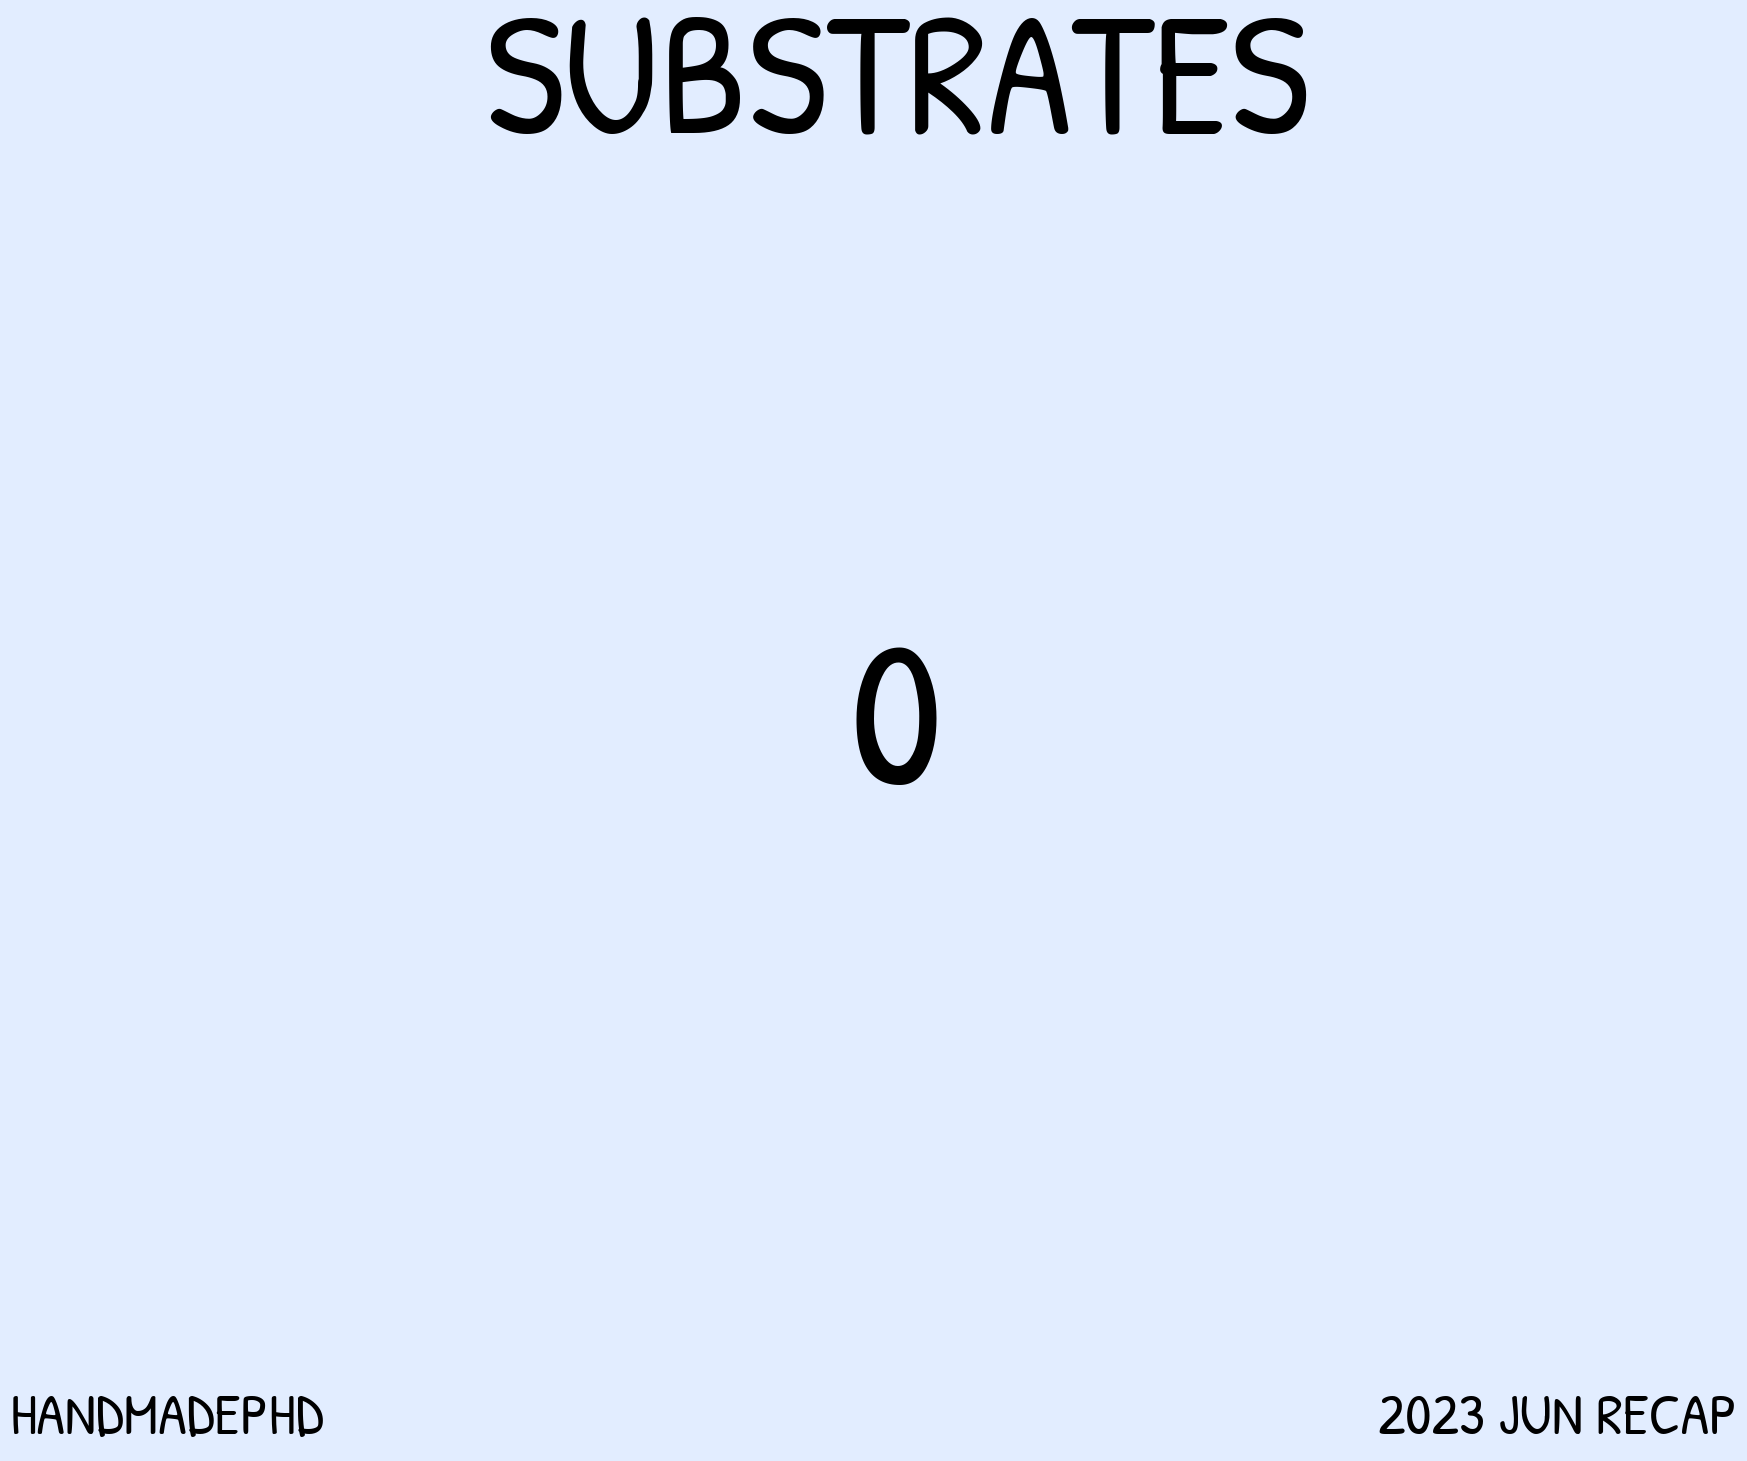

In [47]:
##############
# SUBSTRATES
##############
var="SUBSTRATE"
tab = df.groupby(["PROJECT NAME"]).agg({var: "unique"}).reset_index()
tab[var] = tab[var].str[0]
tab = tab.stb.freq([var])
tab_total = round(sum(tab["count"]),0)

custom_label(tab[var])
custom_wedges()
custom_project_piechart()

# SAVE FIGURE
plt.title("SUBSTRATES", fontsize=125, loc="center")
plt.savefig("substrates.png", dpi=53.35)
plt.show()

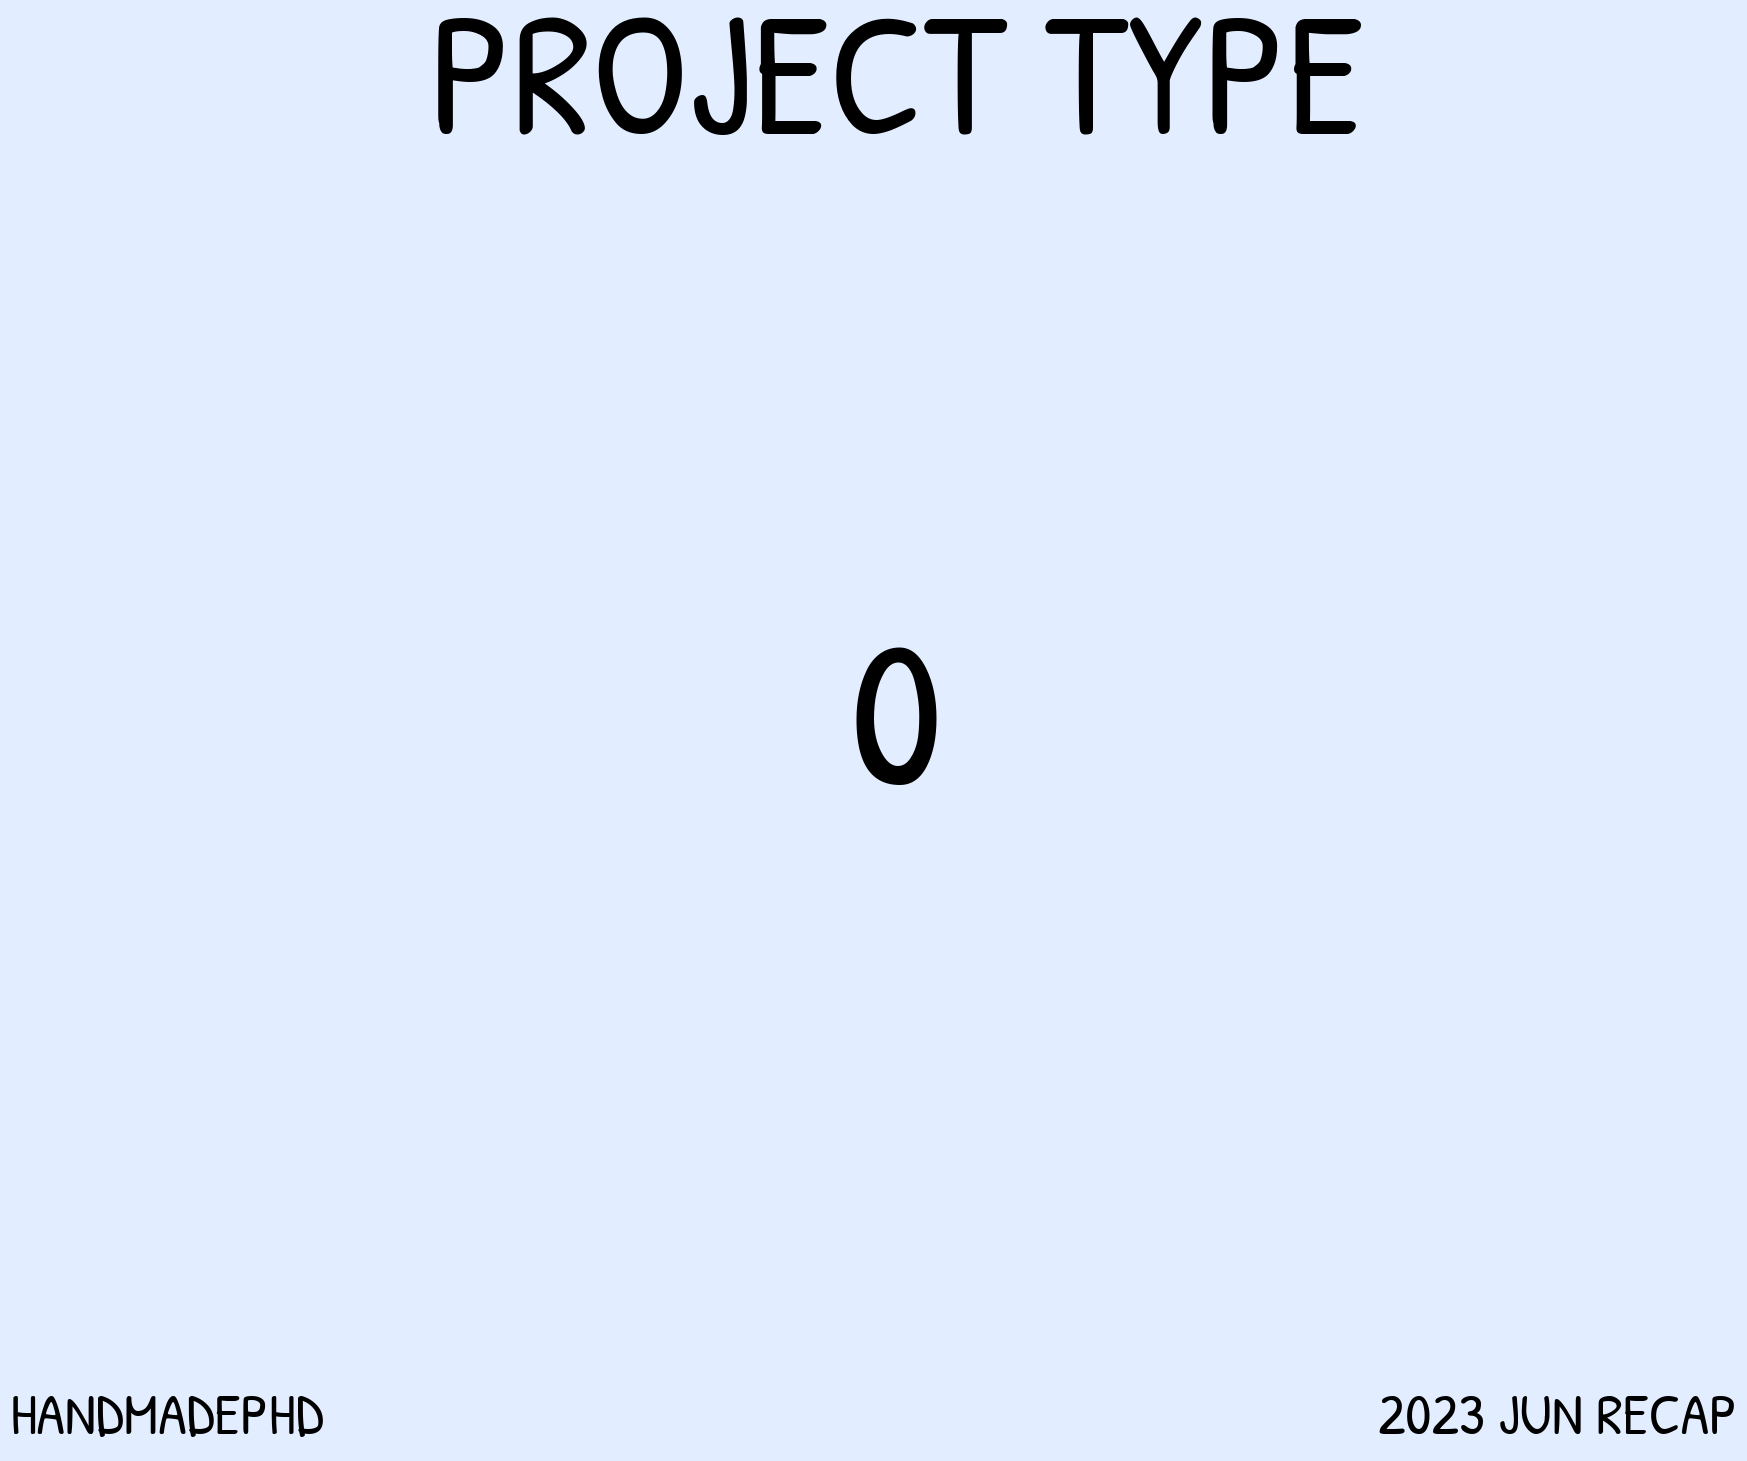

In [48]:
################
# PROJECT TYPE
################
var="PROJECT TYPE"
tab = df.groupby(["PROJECT NAME"]).agg({var: "unique"}).reset_index()
tab[var] = tab[var].str[0]
tab = tab.stb.freq([var])
tab_total = round(sum(tab["count"]),0)

custom_label(tab[var])
custom_wedges()
custom_project_piechart()

# SAVE FIGURE
plt.title("PROJECT TYPE", fontsize=125, loc="center")
plt.savefig("project-type.png", dpi=53.35)
plt.show()

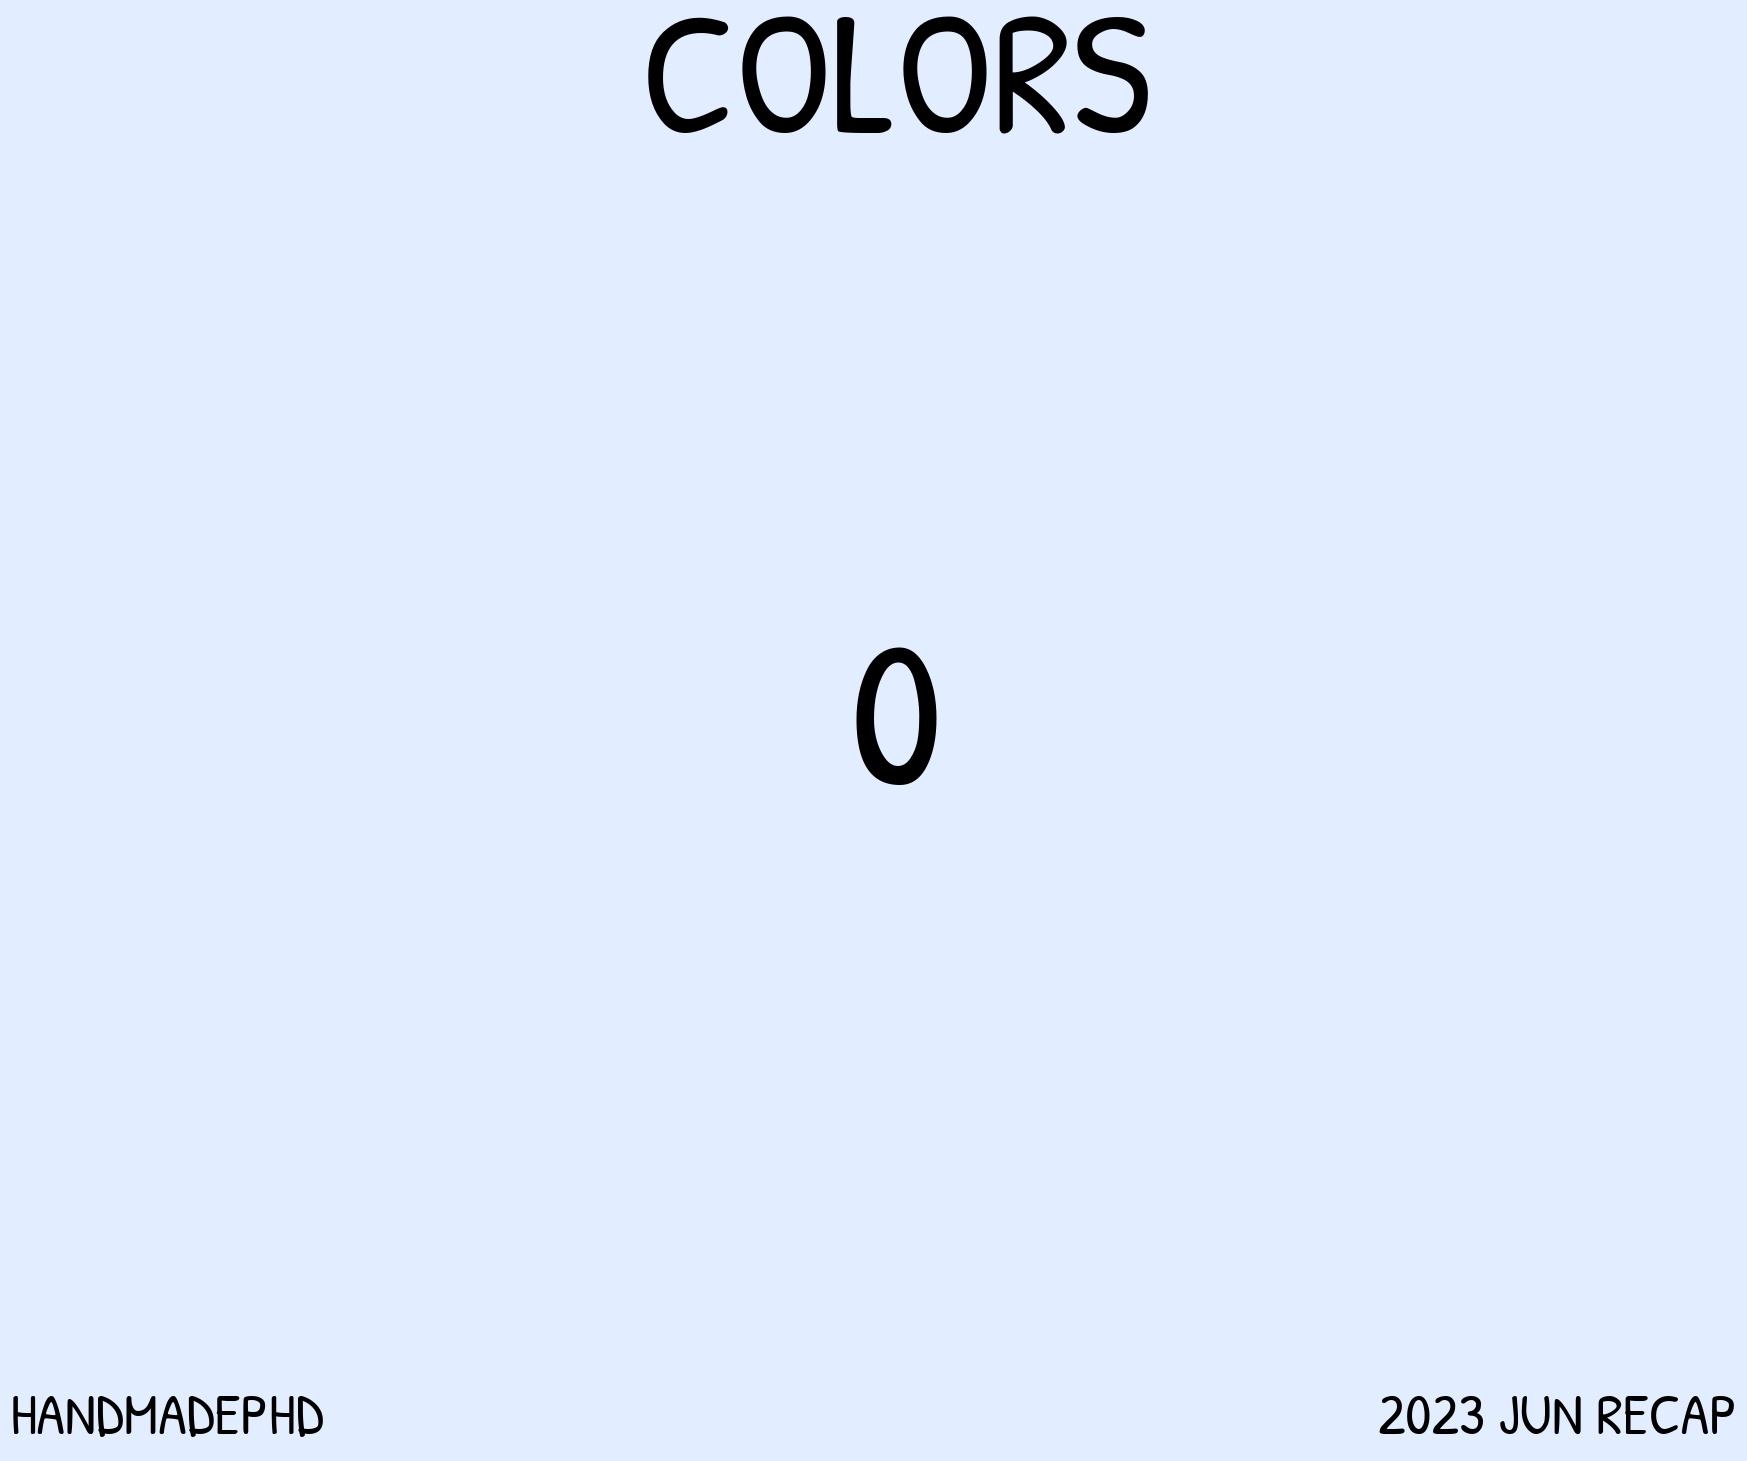

In [49]:
##########
# COLORS
##########
var = "COLOR CATEGORY"
tab = df.groupby(["PROJECT NAME"]).agg({var: "unique"}).reset_index()
tab[var] = tab[var].str[0]
tab = tab.stb.freq([var])
tab_total = round(sum(tab["count"]),0)

custom_label(tab[var])

# CUSTOM WEDGES
colors=list(tab[var])
for i in range(len(colors)):
    if colors[i] == "WHITE":
        colors[i] = "white"
    elif colors[i] == "BLUE":
        colors[i] = "tab:blue"
    elif colors[i] == "ORANGE":
        colors[i] = "tab:orange"
    elif colors[i] == "GREY":
        colors[i] = "tab:gray"
    elif colors[i] == "GREEN":
        colors[i] = "tab:green"
    elif colors[i] == "BROWN":
        colors[i] = "tab:brown"
    elif colors[i] == "PINK":
        colors[i] = "tab:pink"
    elif colors[i] == "PURPLE":
        colors[i] = "tab:purple"
    elif colors[i] == "MULTI":
        colors[i] = "whitesmoke"
    elif colors[i] == "YELLOW":
        colors[i] = "gold"
    elif colors[i] == "RED":
        colors[i] = "tab:red"

custom_project_piechart()

# SAVE FIGURE
plt.title("COLORS", fontsize=125, loc="center")
plt.savefig("colors.png", dpi=53.35)
plt.show()

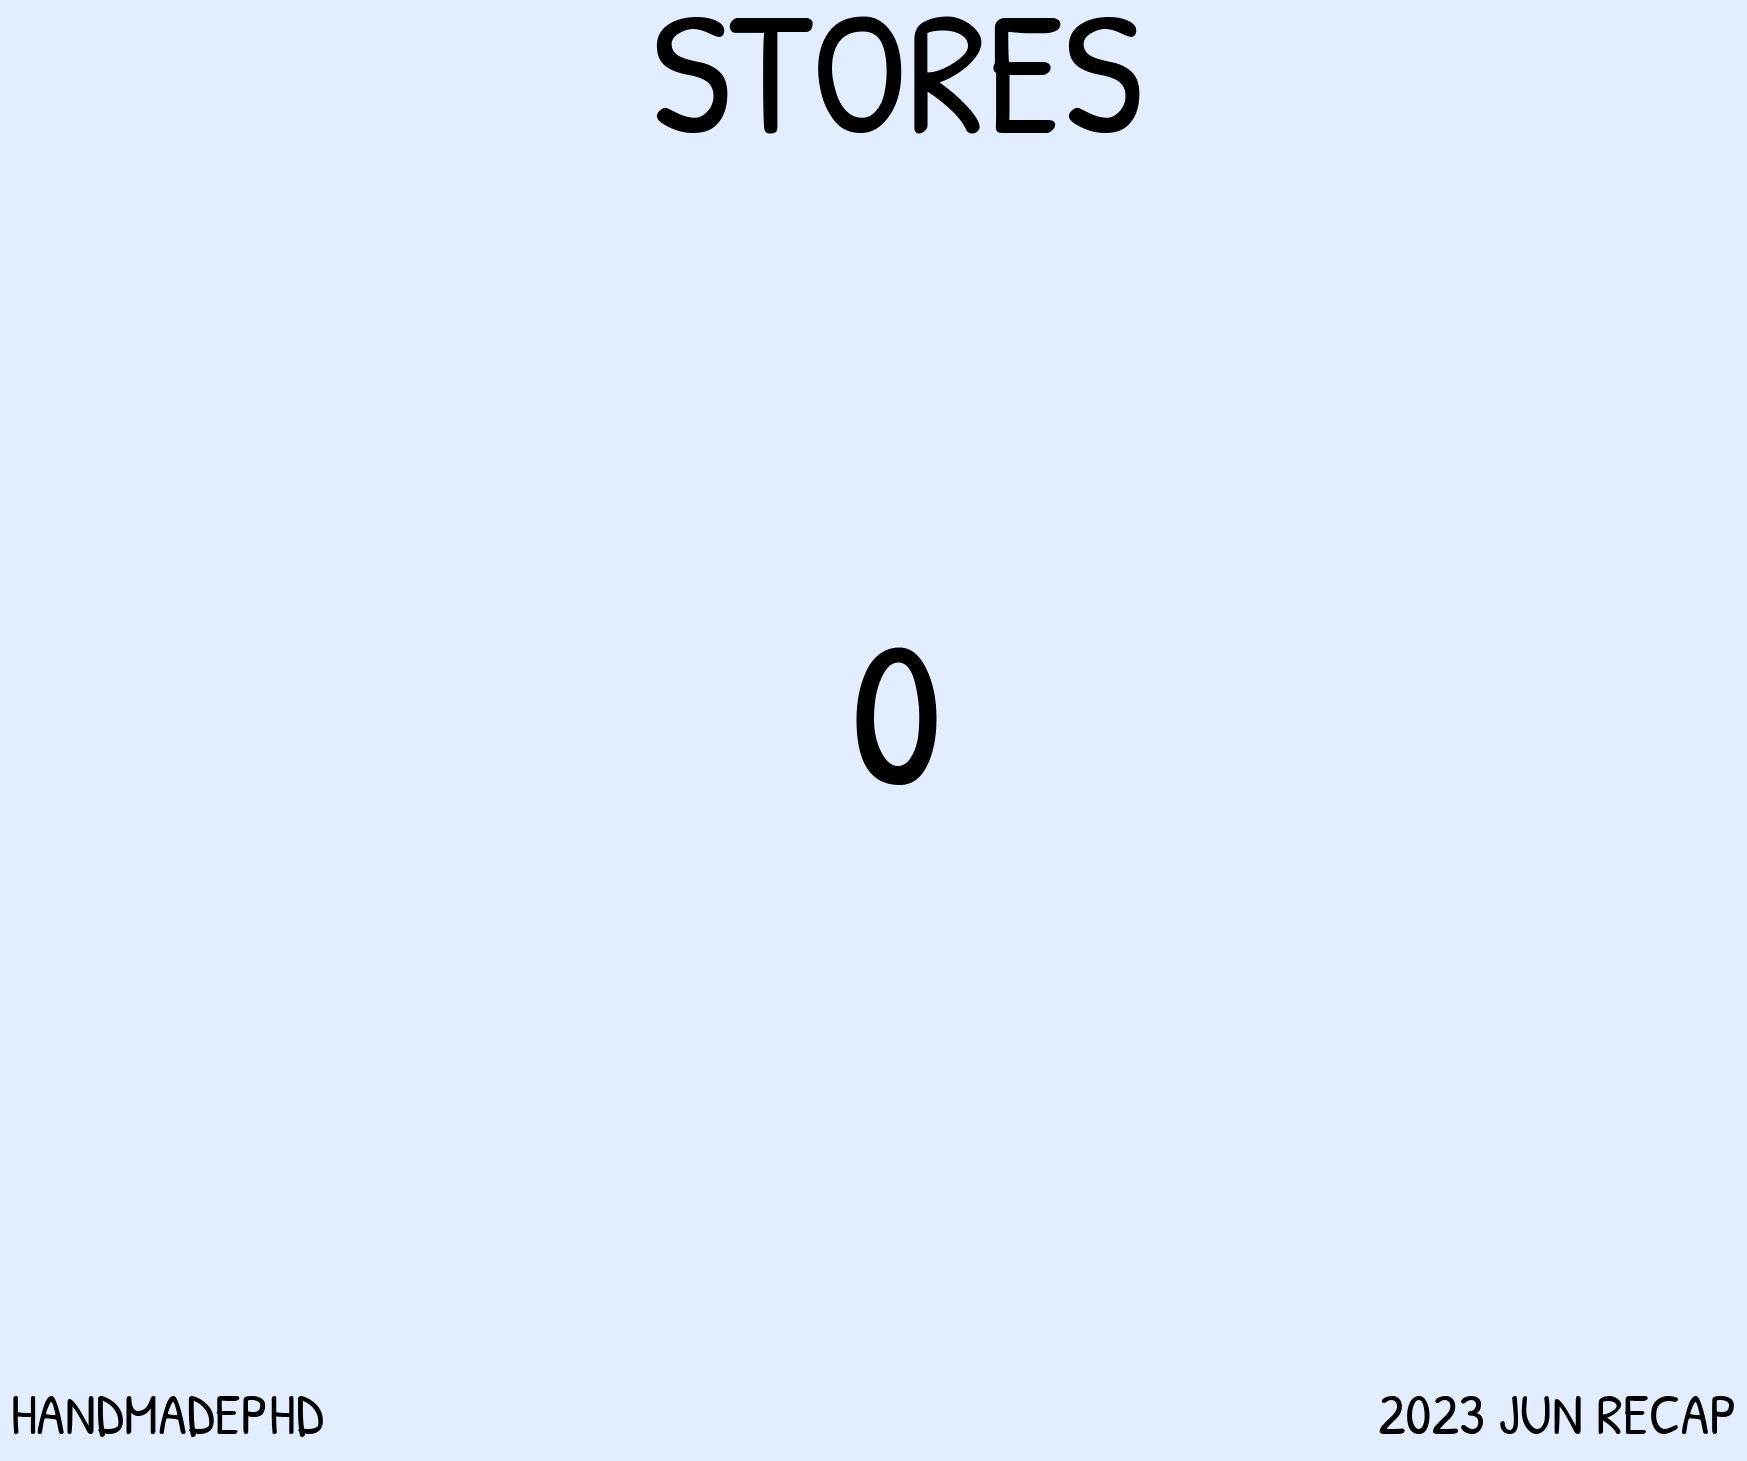

In [50]:
#################
# FABRIC STORES
#################
var="VENDOR"
tab = df.groupby(["PROJECT NAME"]).agg({var: "unique"}).reset_index()
tab[var] = tab[var].str[0]
tab = tab.stb.freq([var])
tab_total = round(sum(tab["count"]),0)

custom_label(tab[var])
custom_wedges()
custom_project_piechart()

# SAVE FIGURE
plt.title("STORES", fontsize=125, loc="center")
plt.savefig("fabric-stores.png", dpi=53.35)
plt.show()

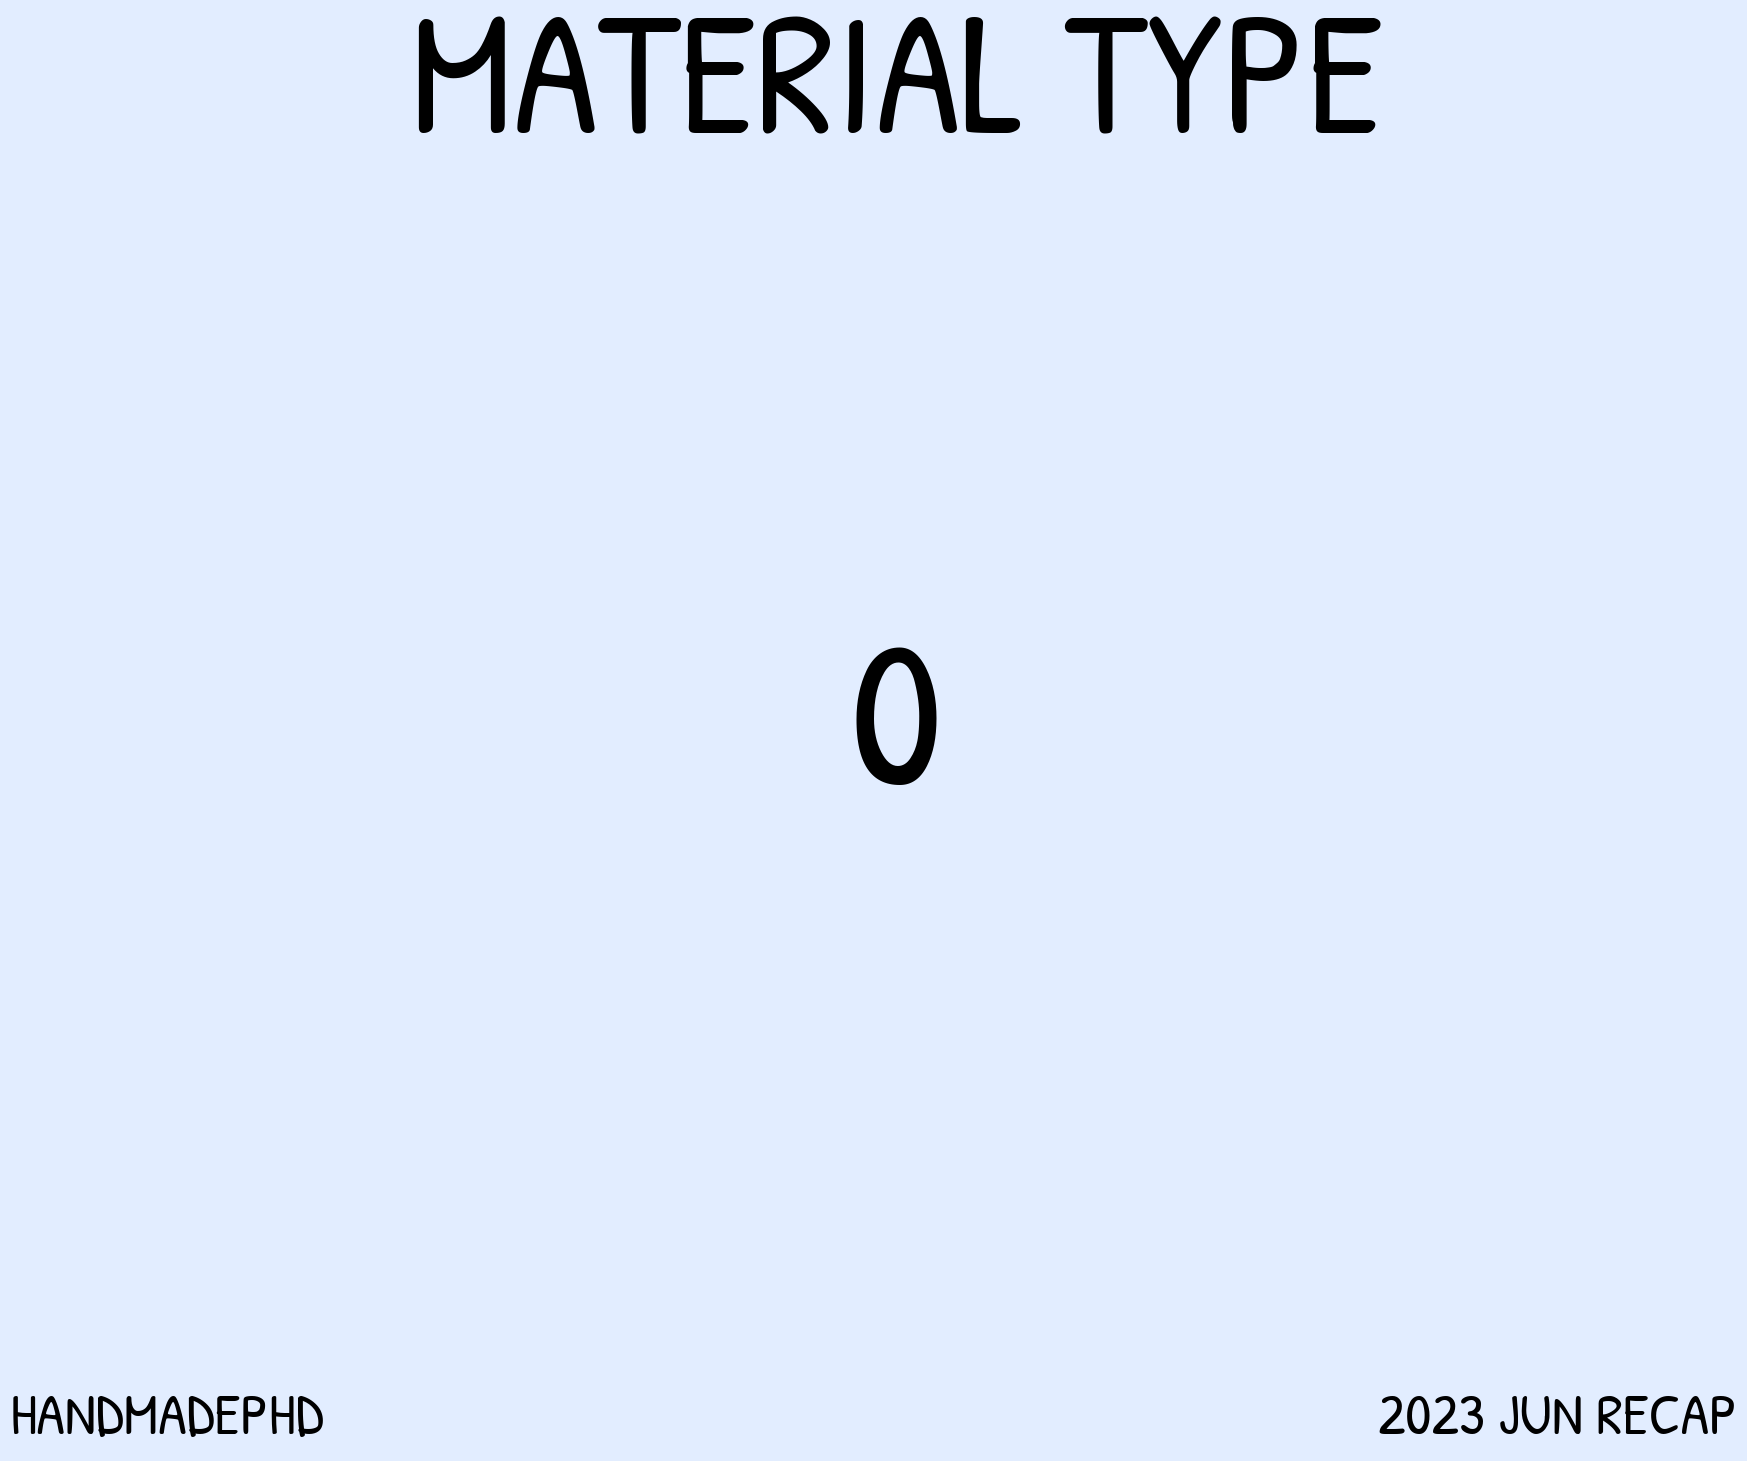

In [51]:
################
# FABRIC TYPES
################
var="FABRIC TYPE"
tab=df.groupby(["PROJECT NAME"]).agg({var: "unique"}).reset_index()
tab[var] = tab[var].str[0]
tab = tab.stb.freq([var])
tab_total = round(sum(tab["count"]),0)

custom_label(tab[var])
custom_wedges()
custom_project_piechart()

# SAVE FIGURE
plt.title("MATERIAL TYPE", fontsize=125, loc="center")
plt.savefig("fabric-type.png", dpi=53.35)
plt.show()

In [52]:
########################
# LOAD TIME DATASHEET
########################
df1 = pd.read_excel(r"../2023-recap.xlsx", sheet_name="TIME", usecols="A:C,F", parse_dates=["DATE"])
df1 = df1[(df1["DATE"].dt.strftime("%Y-%m") >= strt_dt) & (df1["DATE"].dt.strftime("%Y-%m") <= end_dt)]

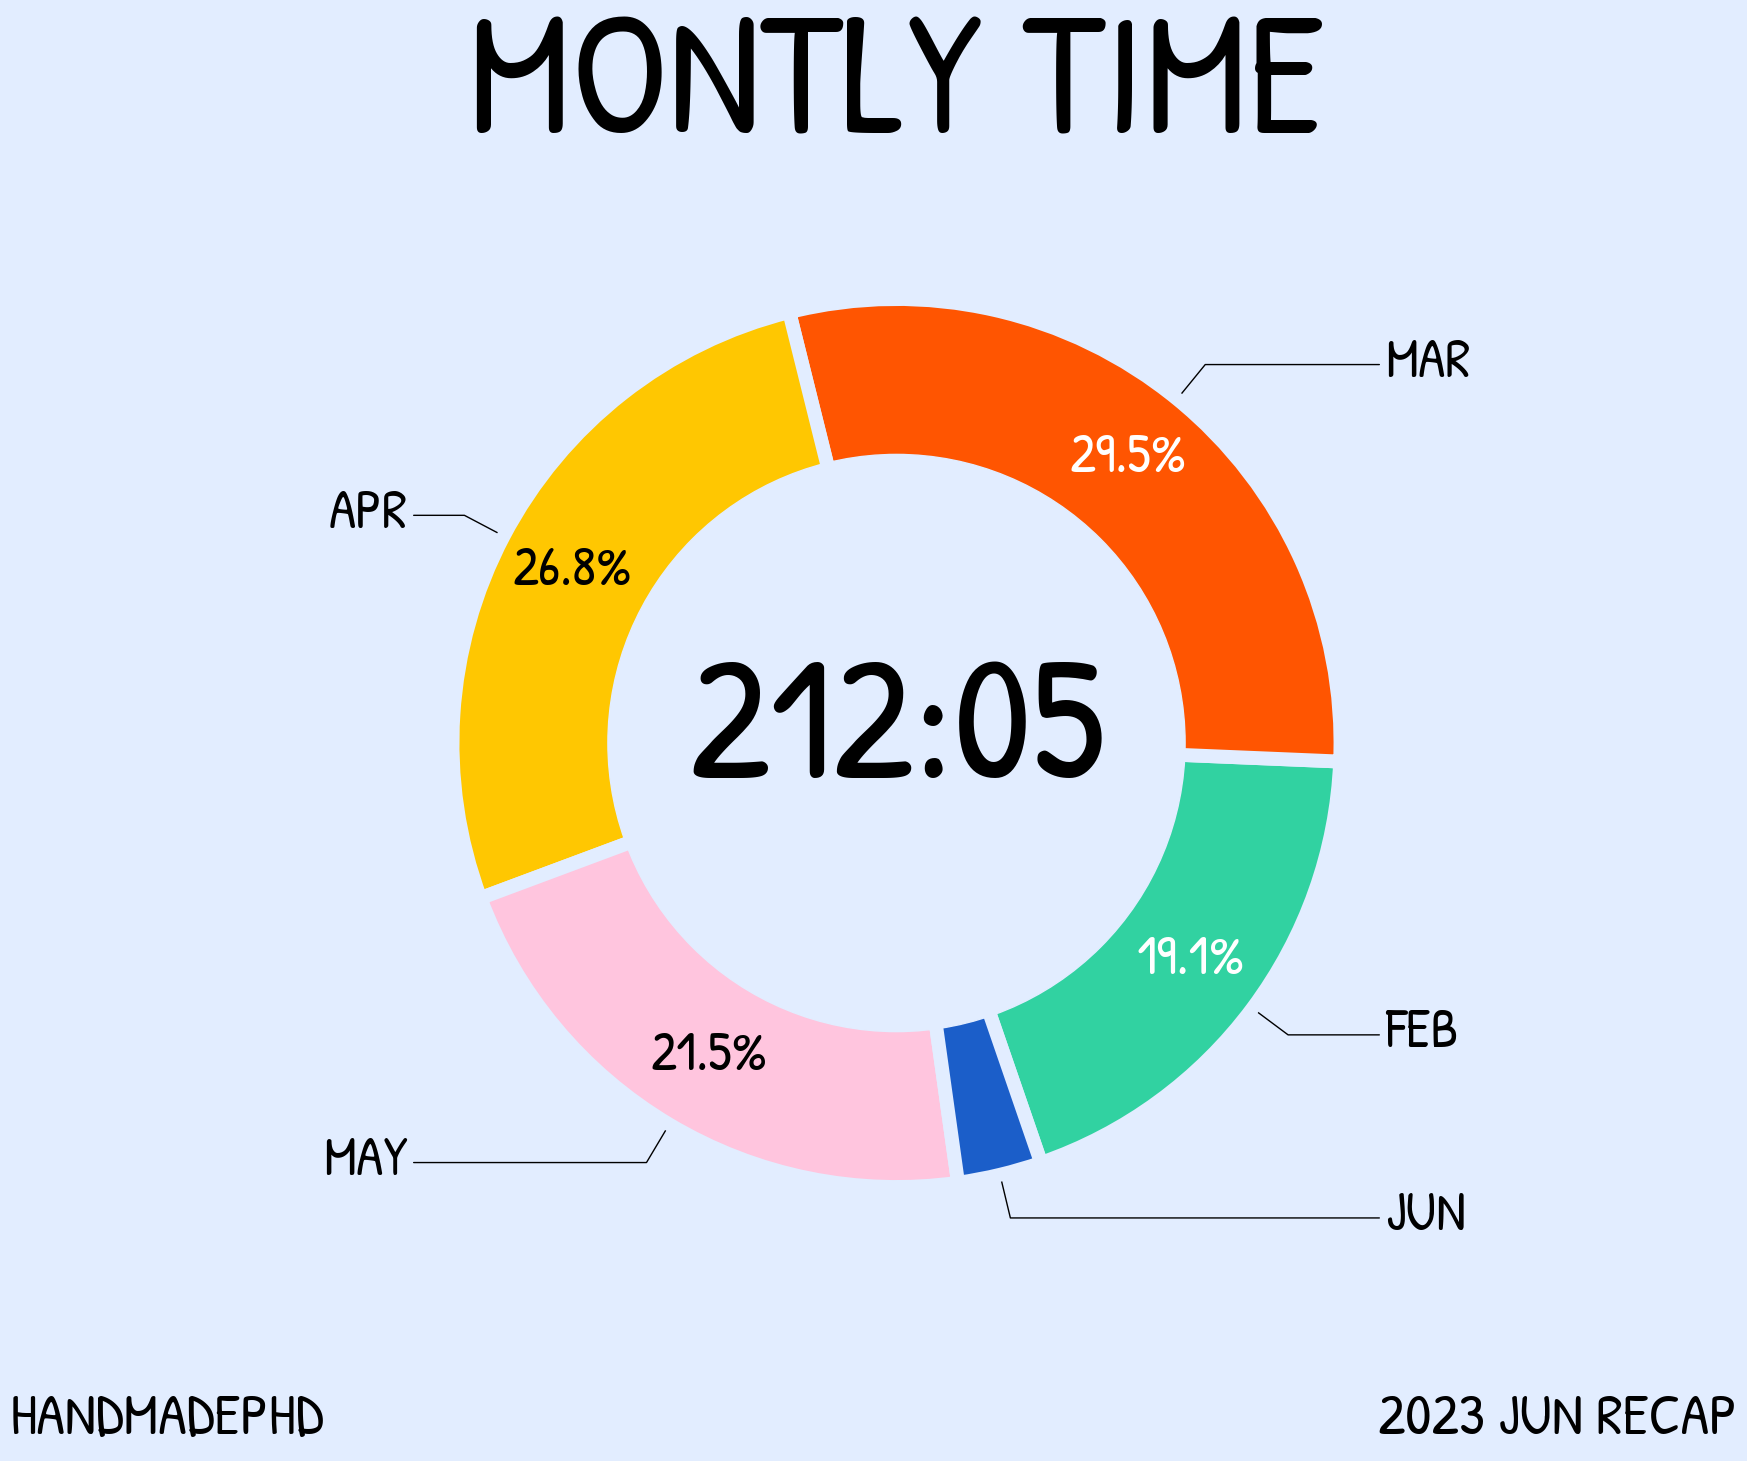

In [53]:
########
# TIME  
########
months = [g for n, g in df1.groupby(pd.Grouper(key='DATE',freq='M'))]
tab_total = []
for i in range(len(months)):
    tab = months[i].stb.freq(["TASK"], value="SECONDS")
    tab_total.append(round(sum(tab["SECONDS"]), 2))

total = sum(tab_total)
total = (secondsToTime(total))

wrapped_labels = month_list[1:]
custom_wedges()

# PLOT
pctscolors = [clrs_txt[k] for k in colors]
fig, ax = plt.subplots(figsize=(18, 15), dpi=100)
wedges, texts, pcts = ax.pie(tab_total, colors=colors, wedgeprops={"linewidth": 10, "edgecolor": "#E2EDFF"}, autopct=custom_autopct_percent, pctdistance=0.825, startangle=random.randint(0, 360))
monthly_piechart()
plt.text(0, 0, "{}".format(total), ha="center", va="center", fontsize=125)

# SAVE FIGURE
plt.title("MONTLY TIME", fontsize=125, loc="center")
plt.savefig("monthly-time.png", dpi=53.35)
plt.show()

In [54]:
########################
# UPDATE TIME DATASHEET
########################
df2 = df1[df1["DATE"] .dt.strftime("%Y-%m") == end_dt]

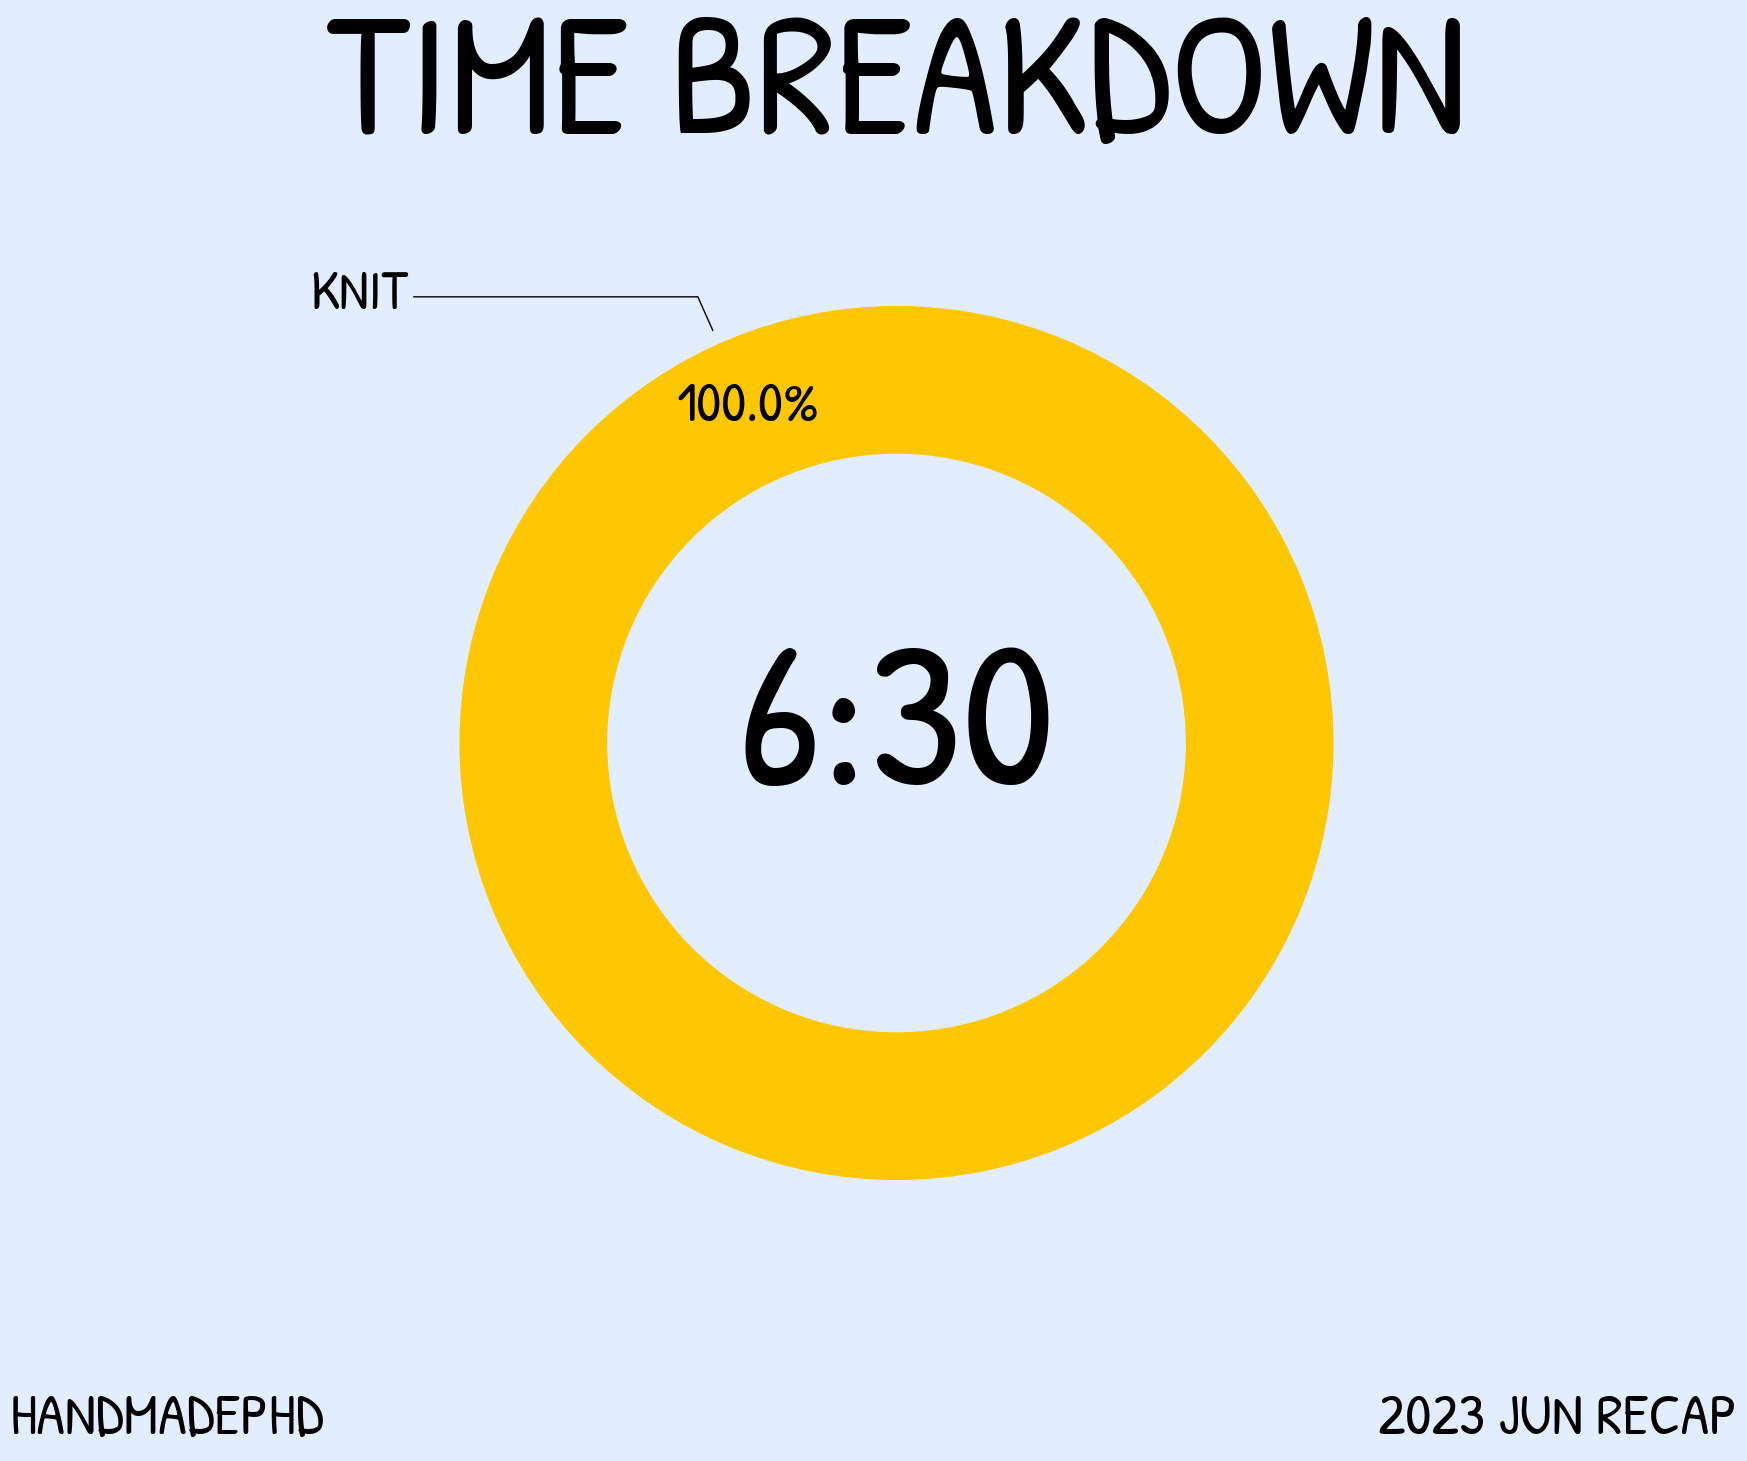

In [55]:
##################
# TIME BREAKDOWN
##################
var = "TASK"
tab = df2.stb.freq([var], value="SECONDS")
tab_total = round(sum(tab["SECONDS"]), 2)
tab_total = (secondsToTime(tab_total))

custom_label(tab[var])
custom_wedges()
custom_project_piechart()

# SAVE FIGURE
plt.title("TIME BREAKDOWN", fontsize=125, loc="center")
plt.savefig("time-breakdown.png", dpi=53.35)
plt.show()

In [56]:
##############################
# TIME PER COMPLETED PROJECT
##############################
tab = df1.stb.freq(["PROJECT NAME", "TASK"], value="SECONDS")
tab = tab.iloc[:, 0:3]
tab = tab.pivot(index="PROJECT NAME", columns=["TASK"])
tab = tab.reset_index()
tab.fillna(0, inplace=True)
tab = pd.DataFrame(tab.to_records(index=False))
tab.columns = [list(tab.columns[0].split("'"))[1],
               list(tab.columns[1].split("'"))[3],
               list(tab.columns[2].split("'"))[3],
               list(tab.columns[3].split("'"))[3],
               list(tab.columns[4].split("'"))[3],
               list(tab.columns[5].split("'"))[3]]

for p in df1["PROJECT NAME"].unique():
    tab.loc[tab["PROJECT NAME"]==p, "DATE"] = df1.loc[df1["PROJECT NAME"]==p, "DATE"].max()

tab.index = tab["DATE"]
tab = tab.sort_index()
tab = pd.DataFrame(tab.to_records(index=False))

for p in df1["PROJECT NAME"].unique():
  strdate = df1.loc[(df1["TASK"]=="COMPLETE") & (df1["PROJECT NAME"]==p), "DATE"].max()
  if pd.isna(strdate) == True:
    tab.drop(tab[tab["PROJECT NAME"]==p].index, inplace=True)
  if pd.isna(strdate) == False:
    if (df1.loc[(df1["TASK"]=="COMPLETE") & (df1["PROJECT NAME"]==p), "DATE"].max().strftime("%Y-%m") != end_dt) == True:
        tab.drop(tab[tab["PROJECT NAME"]==p].index, inplace=True)

tab = tab.reset_index()

# CUSTOM LABELS
custom_label(tab["PROJECT NAME"])

# SET Y AXIS
sew_max = tab[tab['KNIT']==0].sum(axis=1).max()
sew_yticks = sew_interval(sew_max)
knit_max = tab[tab['KNIT']>0].sum(axis=1).max()
knit_yticks = knit_interval(knit_max)

# PLOT SEW
y_offset = -2000
fig, ax1 = plt.subplots(figsize=(18, 15), dpi=100)
bar5 = ax1.bar(tab["PROJECT NAME"], tab["SEW"], color="#FFC701", bottom=tab["CUT"]+tab["TEST"]+tab["PDF"], label ="SEW")
for i, bar in enumerate(bar5.patches):
  ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + bar.get_y() + y_offset, ["" if word <= "00:30" else word for word in list(pd.to_datetime(tab["SEW"], unit="s").dt.strftime("%H:%M"))][i], ha="center")

# PLOT CUT
bar4 = ax1.bar(tab["PROJECT NAME"], tab["CUT"], color="#FF5501", bottom=tab["TEST"]+tab["PDF"], label ="CUT")
for i, bar in enumerate(bar4.patches):
  ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + bar.get_y() + y_offset, ["" if word <= "00:30" else word for word in list(pd.to_datetime(tab["CUT"], unit="s").dt.strftime("%H:%M"))][i], ha="center")

# PLOT TEST
bar3 = ax1.bar(tab["PROJECT NAME"], tab["TEST"], color="#FFC5DE", bottom=tab["PDF"], label ="TEST")
for i, bar in enumerate(bar3.patches):
  ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + bar.get_y() + y_offset, ["" if word <= "00:30" else word for word in list(pd.to_datetime(tab["TEST"], unit="s").dt.strftime("%H:%M"))][i], ha="center")

# PLOT PDF
bar2 = ax1.bar(tab["PROJECT NAME"], tab["PDF"], color="#31D2A1", label ="PDF")
for i, bar in enumerate(bar2.patches):
  ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + bar.get_y() + y_offset, ["" if word <= "00:30" else word for word in list(pd.to_datetime(tab["PDF"], unit="s").dt.strftime("%H:%M"))][i], ha="center")

# FORMAT PLOT
plt.xticks(tab["PROJECT NAME"], wrapped_labels)
ax1.set_yticks(sew_yticks)
labels = [time[k] for k in sew_yticks]
ax1.set_yticklabels(labels)
plt.title("TIME PER PROJECT", fontsize=100)
plt.ylabel("SEW")
plt.xlabel("")
plt.subplots_adjust(bottom=0.18)
plt.subplots_adjust(top=0.875)

# ADD TOTAL TIME
for i in range(len(ax1.get_xticklabels())):
  ax1.text(i, tab[["CUT", "PDF", "SEW", "TEST"]].loc[i].sum() + 1000, secondsToTime(tab[["CUT", "PDF", "SEW", "TEST"]].loc[i].sum()), ha="center", va="center")

# PLOT KNIT
xloc=tab.index[tab['KNIT']>0].tolist()
ax2 = ax1.twinx()
bar1 = ax2.bar(tab["PROJECT NAME"], tab["KNIT"], color="#1B5EC9", label ="KNIT")
for item in range(len(xloc)):
    ax2.text(xloc[item], tab[["KNIT"]].loc[xloc[item]].sum() + 2000, secondsToTime(tab[["KNIT"]].loc[xloc[item]].sum()), ha="center", va="center")

ax2.set_yticks(knit_yticks)
labels = [time[k] for k in knit_yticks]
ax2.set_yticklabels(labels, color="#1B5EC9")
plt.ylabel("KNIT", color="#1B5EC9")
plt.figlegend(loc="upper left", bbox_to_anchor=(.127, .875), fontsize=24)
plt.text(0.02, 0.02, username, fontsize=42, transform=plt.gcf().transFigure)
plt.text(0.78, 0.02, month_label, fontsize=42, transform=plt.gcf().transFigure)

# SAVE FIGURE
plt.savefig("time-project.png", dpi=53.35)
plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Error in callback <function _draw_all_if_interactive at 0x168069260> (for post_execute):


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Figure size 1800x1500 with 1 Axes>

In [57]:
############################
# DAYS TO COMPLETE PROJECT
############################
dfs=pd.DataFrame(columns=list("ABC"))
for p in df1["PROJECT NAME"].unique():
    sta = df1.loc[df1["PROJECT NAME"]==p, "DATE"].min()
    end = df1.loc[df1["PROJECT NAME"]==p, "DATE"].max()
    row_to_append = pd.DataFrame([[p, sta, end]], columns=list("ABC"))
    dfs = pd.concat([dfs,row_to_append])
  
dfs["D"] = (dfs["C"] - dfs["B"]).dt.days
dfs = dfs.reset_index().drop("index", axis=1)
for p in df1["PROJECT NAME"].unique():
  strdate = df1.loc[(df1["TASK"]=="COMPLETE") & (df1["PROJECT NAME"]==p), "DATE"].max()
  if pd.isna(strdate) == True:
    dfs.drop(dfs[dfs["A"]==p].index, inplace=True)
  if pd.isna(strdate) == False:
    if (df1.loc[(df1["TASK"]=="COMPLETE") & (df1["PROJECT NAME"]==p), "DATE"].max().strftime("%Y-%m") != end_dt) == True:
        dfs.drop(dfs[dfs["A"]==p].index, inplace=True)

dfs.columns = ["PROJECT NAME", "START", "END", "DAYS"]
dfs.index = dfs["END"]
dfs = dfs.sort_index()
dfs = pd.DataFrame(dfs.to_records(index=False))

# CUSTOM LABELS
custom_label(tab["PROJECT NAME"])

# CUSTOM WEDGES
custom_wedges()

# PLOT    
fig, ax = plt.subplots(figsize=(18, 15), dpi=100)
ax.bar(dfs["PROJECT NAME"], dfs["DAYS"], color=colors)

# FINAL FORMATTING
plt.xticks(dfs["PROJECT NAME"], wrapped_labels)
plt.title("DAYS PER PROJECT", fontsize=100)
plt.ylabel("DAYS")
plt.xlabel("")
plt.subplots_adjust(bottom=0.18)
plt.subplots_adjust(top=0.875)
ax.bar_label(ax.containers[0], label_type='edge')
plt.text(0.02, 0.02, username, fontsize=42, transform=plt.gcf().transFigure)
plt.text(0.78, 0.02, month_label, fontsize=42, transform=plt.gcf().transFigure)

# SAVE FIGURE

plt.savefig("day-project.png", dpi=53.35)
plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Error in callback <function _draw_all_if_interactive at 0x168069260> (for post_execute):


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Figure size 1800x1500 with 1 Axes>

In [58]:
#########################
# FABRIC USED VS BOUGHT
#########################
df = pd.read_excel(r"../2023-recap.xlsx", sheet_name="PROJECTS")
df["ARRIVED"] = df["ARRIVED"].astype("datetime64[ns]")
df["STARTED"] = df["STARTED"].astype("datetime64[ns]")
df["PROJECT COMPLETED"] = df["PROJECT COMPLETED"].astype("datetime64[ns]")
df = df[df["PROJECT COMPLETED"].dt.strftime("%Y-%m") <= end_dt]

# SUBSET ONLY SEWING PROJECTS
df = df[(df["METHOD"] == "SEW")]
conv = {"YD": {"YD": 1, "M": 1.093613}}
for col, unit in [("AMOUNT ORDERED", "YD"), ("AMOUNT USED", "YD")]:
    df[col] = df[col] * df[f"{col} UNIT"].map(conv[unit])
    df[f"{col} UNIT"] = unit

# CALCULATE SUM OF AMOUNT ORDERED AND AMOUNT USED PER MONTH
df1 = df[df["PURCHASED"].dt.strftime("%Y-%m") >= strt_dt]
df1 = df1.groupby(pd.Grouper(key='PURCHASED',freq='M'))['AMOUNT ORDERED'].sum().fillna(0)
df2 = df[df["PROJECT COMPLETED"].dt.strftime("%Y-%m") >= strt_dt]
df2 = df2.groupby(pd.Grouper(key='PROJECT COMPLETED',freq='M'))['AMOUNT USED'].sum().fillna(0)

# CREATE NEW DATASET
df3 = pd.concat([df1, df2], axis=1)
df3['MONTHS'] = month_list
df3 = df3[['MONTHS', 'AMOUNT ORDERED', 'AMOUNT USED']]

# TRANSPOSE DATASET
df4 = df3.transpose()
headers = df4.iloc[0].values
df4.columns = headers
df4 = df4.iloc[1:, :]
df4.replace(np.NaN, 0, inplace=True)

# STACKED BARPLOT
fig, ax = plt.subplots(figsize=(18, 15), dpi=100)
for i,col in enumerate(df4.columns):
    ax.bar(df4.index, height=df4[col], bottom=df4.iloc[:,:i].sum(axis=1), color=clrs[i], label=col)

# FINAL FORMATTING
plt.xticks(fontsize=42)
plt.title("MONTHLY FABRIC USAGE", fontsize=100)
plt.ylabel("YARDS", fontsize=42)
plt.xlabel("", fontsize=42)
plt.subplots_adjust(bottom=0.125)
plt.subplots_adjust(top=0.875)
plt.text(0.02, 0.02, username, fontsize=42, transform=plt.gcf().transFigure)
plt.text(0.78, 0.02, month_label, fontsize=42, transform=plt.gcf().transFigure)
plt.figlegend(loc="upper left", bbox_to_anchor=(.125, .875), fontsize=24)
    
# SAVE FIGURE
plt.savefig("monthly-fabric-usage.png", dpi=53.35)
plt.show()

ValueError: Length of values (6) does not match length of index (5)

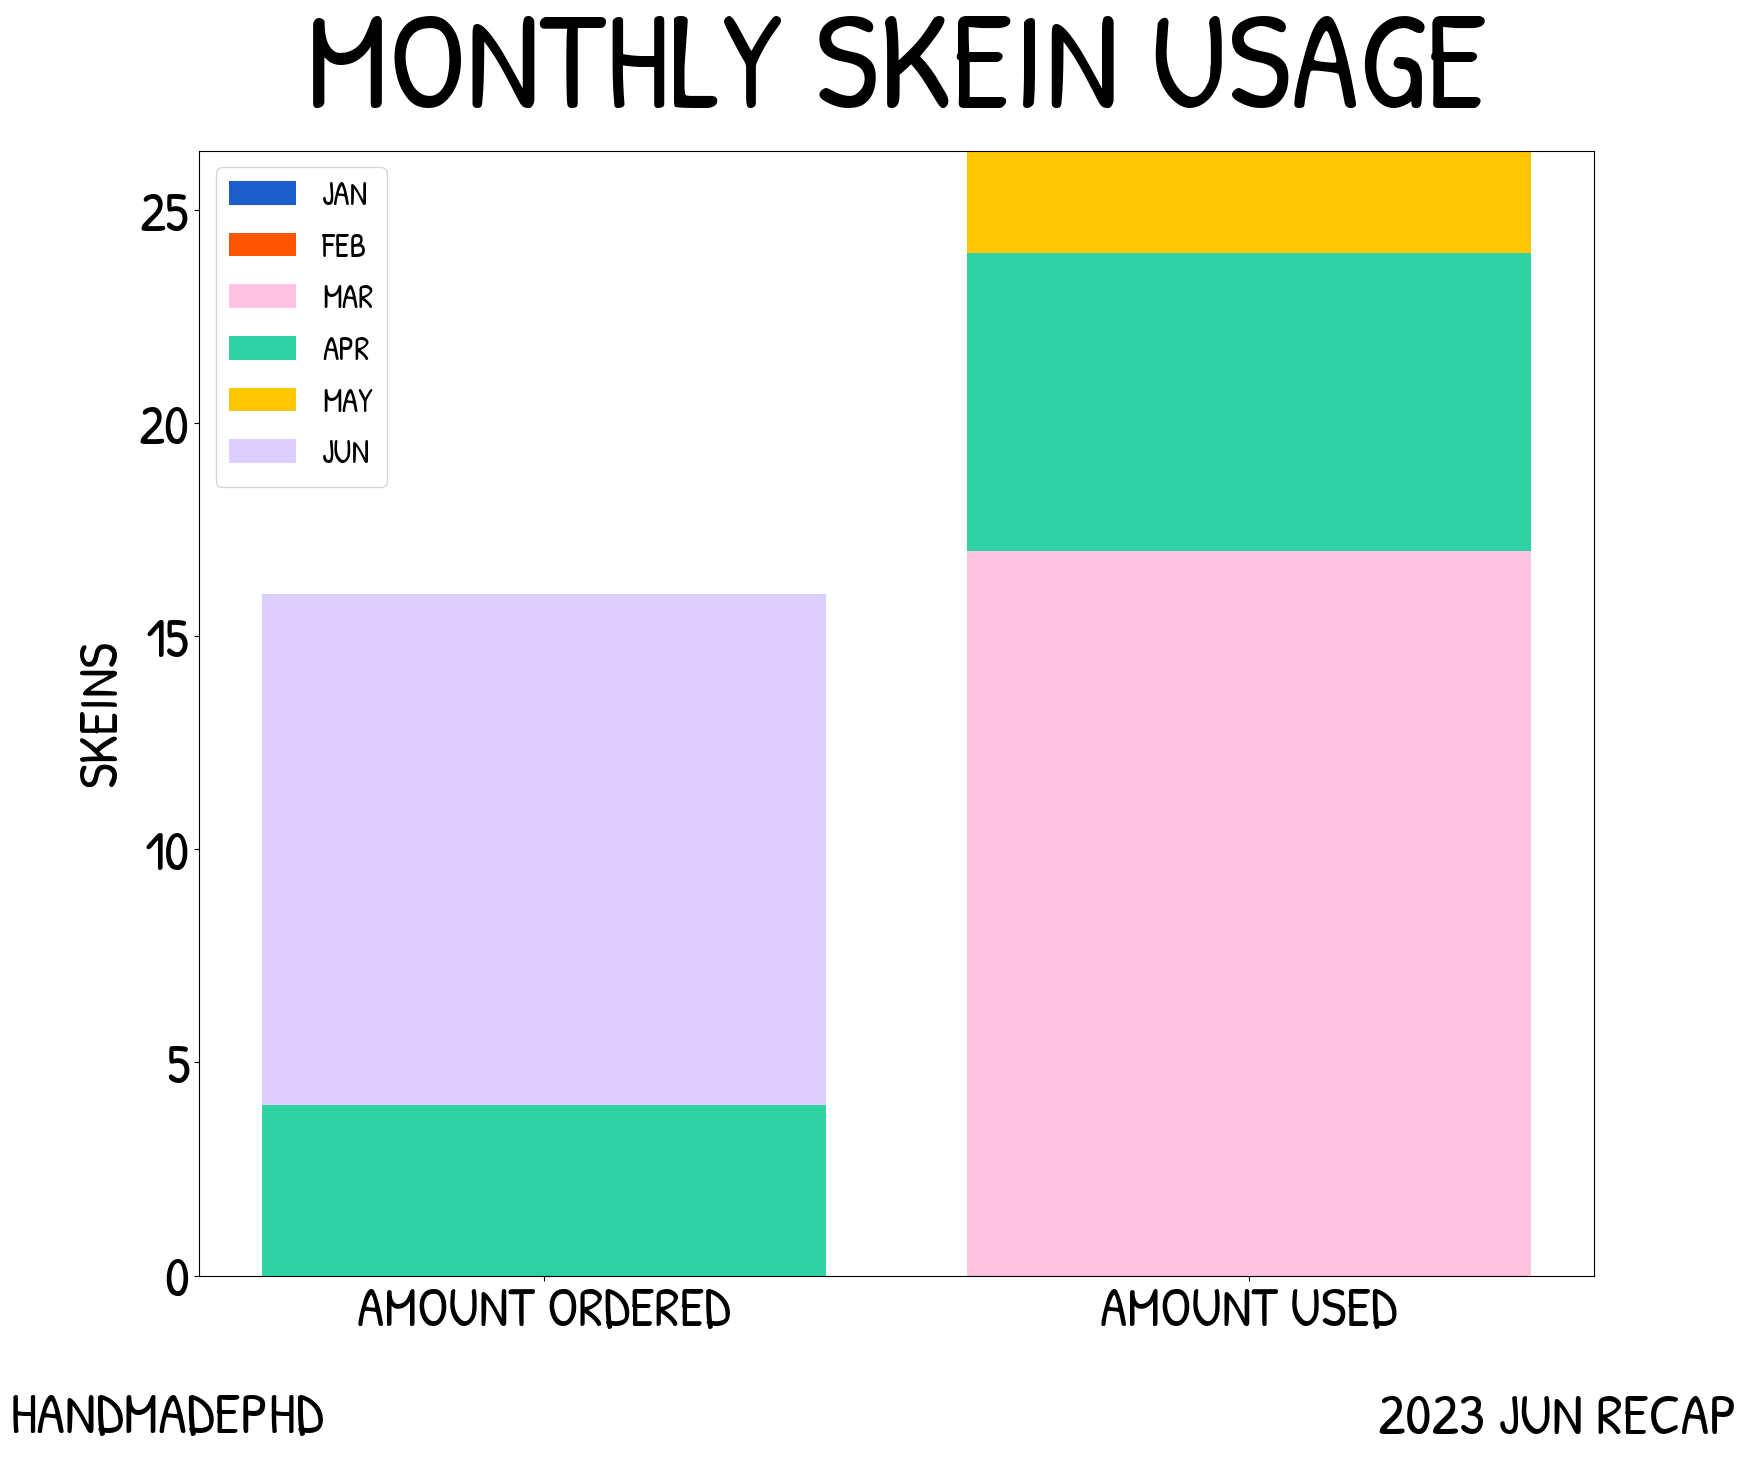

In [59]:
#######################
# KNIT USED VS BOUGHT
#######################
df = pd.read_excel(r"../2023-recap.xlsx", sheet_name="PROJECTS")
df["ARRIVED"] = df["ARRIVED"].astype("datetime64[ns]")
df["STARTED"] = df["STARTED"].astype("datetime64[ns]")
df["PROJECT COMPLETED"] = df["PROJECT COMPLETED"].astype("datetime64[ns]")

# SUBSET ONLY KNITTING PROJECTS
df = df[(df["METHOD"] == "KNIT")]

# CALCULATE SUM OF AMOUNT ORDERED AND AMOUNT USED PER MONTH
df1 = df[df["PURCHASED"].dt.strftime("%Y-%m") >= strt_dt]
df1 = df1.groupby(pd.Grouper(key='PURCHASED',freq='M'))['AMOUNT ORDERED'].sum().fillna(0)
df2 = df[df["PROJECT COMPLETED"].dt.strftime("%Y-%m") >= strt_dt]
df2 = df2.groupby(pd.Grouper(key='PROJECT COMPLETED',freq='M'))['AMOUNT USED'].sum().fillna(0)

# CREATE NEW DATASET
df3 = pd.concat([df1, df2], axis=1)
df3.index = pd.to_datetime(df3.index)
df3.index = df3.index.strftime("%Y-%m")
df3 = df3[df3.index <= end_dt]
df3['MONTHS'] = month_list
df3 = df3[['MONTHS', 'AMOUNT ORDERED', 'AMOUNT USED']]

# TRANSPOSE DATASET
df4 = df3.transpose()
headers = df4.iloc[0].values
df4.columns = headers
df4 = df4.iloc[1:, :]
df4.replace(np.NaN, 0, inplace=True)

# STACKED BARPLOT
fig, ax = plt.subplots(figsize=(18, 15), dpi=100)
for i,col in enumerate(df4.columns):
    ax.bar(df4.index, height=df4[col], bottom=df4.iloc[:,:i].sum(axis=1), color=clrs[i], label=col)

# FINAL FORMATTING
plt.title("MONTHLY SKEIN USAGE", fontsize=100)
plt.ylabel("SKEINS")
plt.xlabel("")
plt.subplots_adjust(bottom=0.125)
plt.subplots_adjust(top=0.875)
plt.text(0.02, 0.02, username, fontsize=42, transform=plt.gcf().transFigure)
plt.text(0.78, 0.02, month_label, fontsize=42, transform=plt.gcf().transFigure)
plt.figlegend(loc="upper left", bbox_to_anchor=(.125, .875), fontsize=24)
    
# SAVE FIGURE
plt.savefig("monthly-skein-usage.png", dpi=53.35)
plt.show()

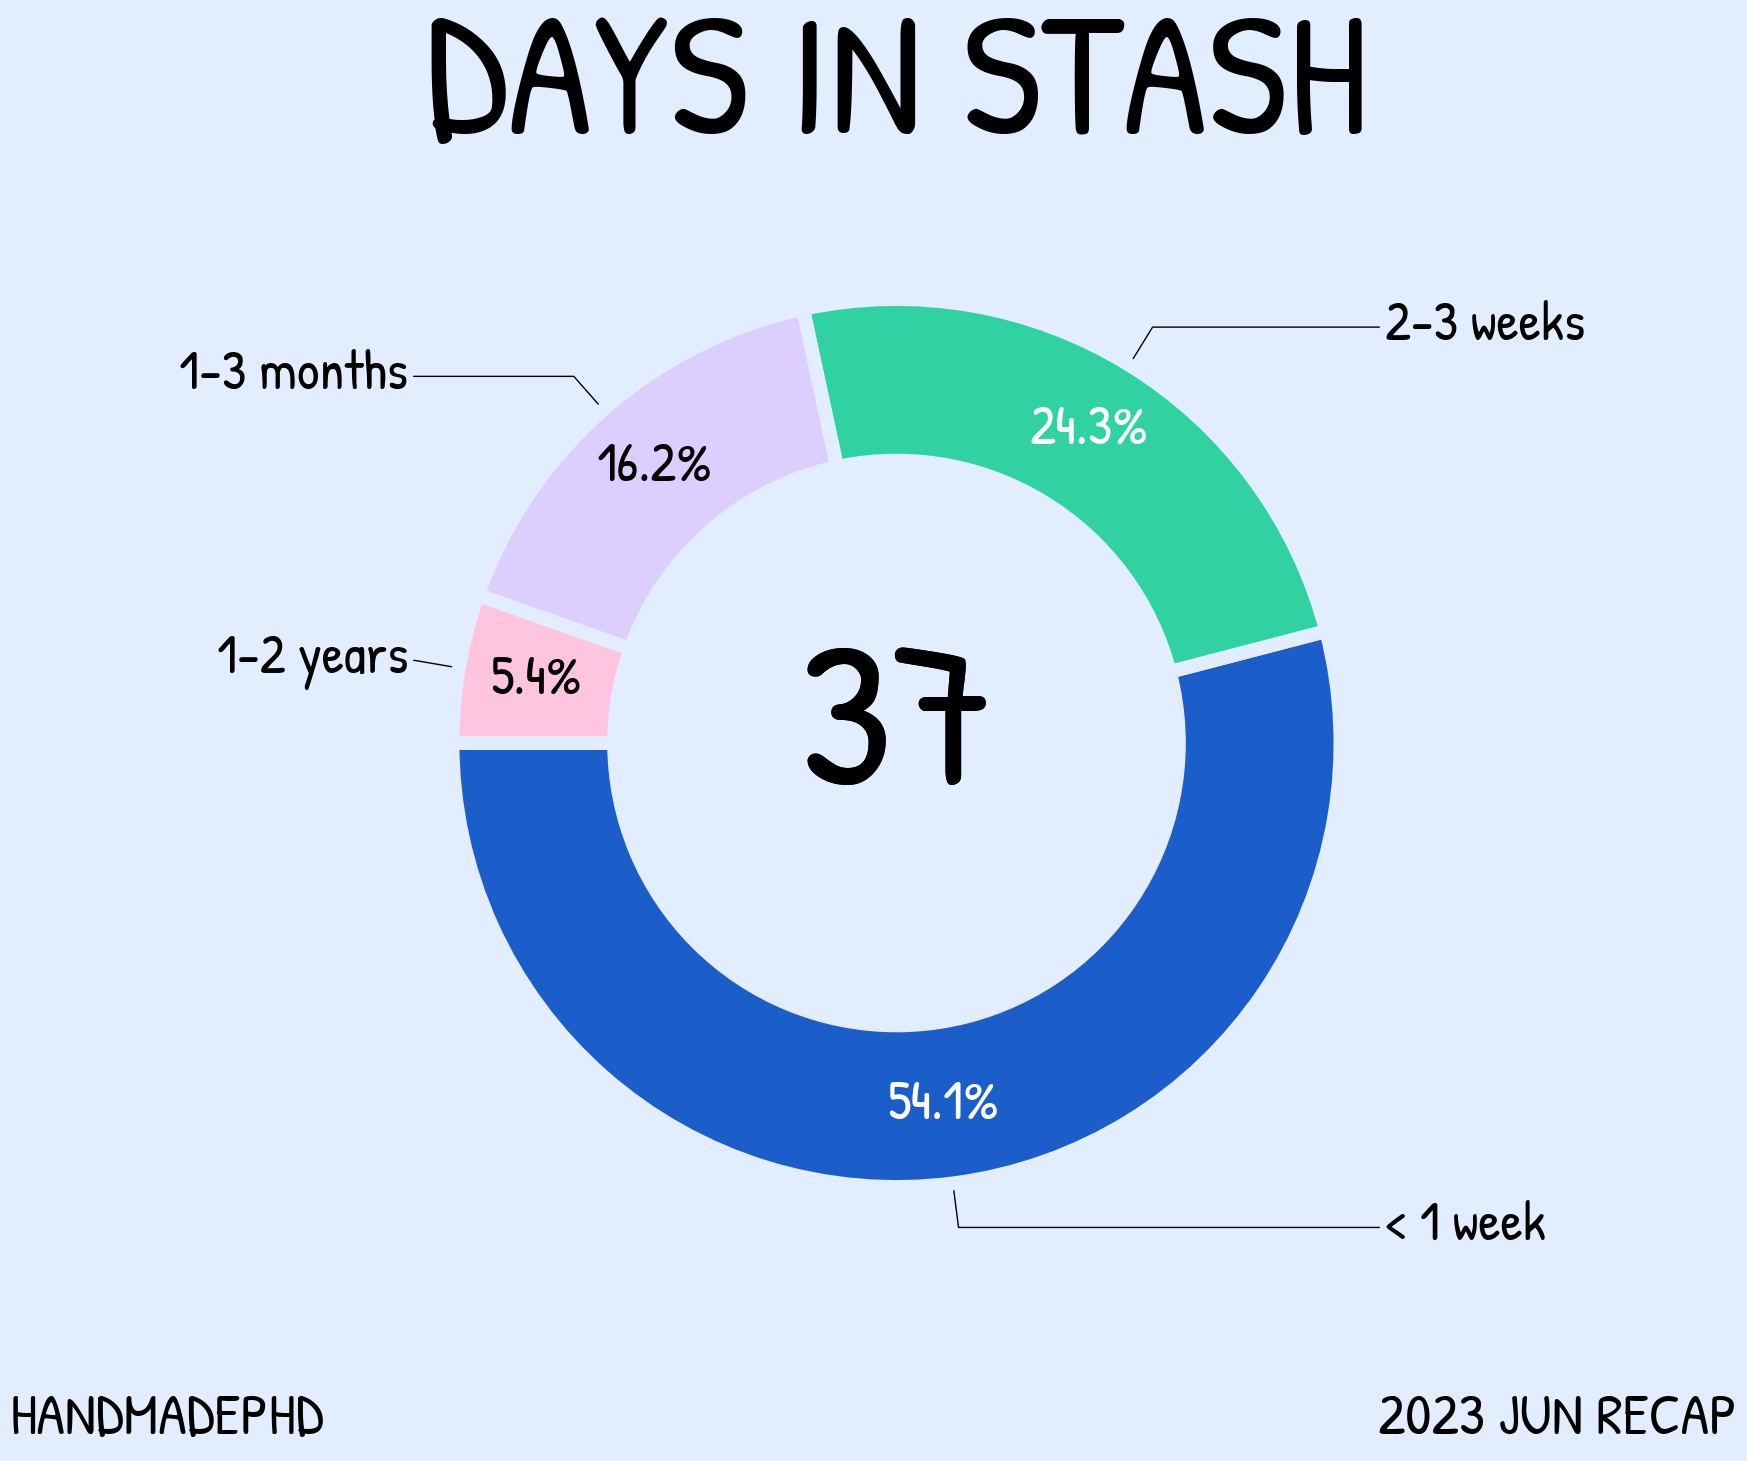

In [60]:
################
# DAYS IN STASH
################
df = pd.read_excel(r"../2023-recap.xlsx", sheet_name="PROJECTS")
df["ARRIVED"] = df["ARRIVED"].astype("datetime64[ns]")
df["STARTED"] = df["STARTED"].astype("datetime64[ns]")
df["PROJECT COMPLETED"] = df["PROJECT COMPLETED"].astype("datetime64[ns]")
df = df[df["PROJECT COMPLETED"].dt.strftime("%Y-%m") <= end_dt]
df['DAYS IN STASH'] = df['DAYS IN STASH'].fillna(0)
bins = [-1, 7, 30, 90, 182, 365, 730, np.inf]
names = ['< 1 week', '2-3 weeks', '1-3 months', '3-6 months', '6-12 months', '1-2 years', '2+ years']
df['DAYS IN STASH CATEGORY'] = pd.cut(df['DAYS IN STASH'], bins, labels=names)

var = "DAYS IN STASH CATEGORY"
tab = df.groupby(["PROJECT NAME"]).agg({var: "unique"}).reset_index()
tab[var] = tab[var].str[0]
tab = tab.stb.freq([var])
tab_total = round(sum(tab["count"]),0)

custom_label(tab[var])
custom_wedges()

# PLOT
pctscolors = [clrs_txt[k] for k in colors]
custom_project_piechart()
plt.text(0, 0, "{}".format(tab_total), ha="center", va="center", fontsize=150)

# SAVE FIGURE
plt.title("DAYS IN STASH", fontsize=125, loc="center")
plt.savefig("monthly-stash.png", dpi=53.35)
plt.show()

In [61]:
########################
# SUMMARY AND AVERAGES
########################
df = pd.read_excel(r"../2023-recap.xlsx", sheet_name="PROJECTS")
df["MADE FOR"].replace(to_replace=["NAOMI"], value="ME", inplace=True)
df["MADE FOR"].replace(to_replace=["RYAN"], value="NOT ME", inplace=True)
df["ARRIVED"] = df["ARRIVED"].astype("datetime64[ns]")
df["STARTED"] = df["STARTED"].astype("datetime64[ns]")
df["PROJECT COMPLETED"] = df["PROJECT COMPLETED"].astype("datetime64[ns]")

# SEWING SUMMARY AND AVERAGES
sw=df[(df["METHOD"] == "SEW")]
conv = {"YD": {"YD": 1, "M": 1.093613}}
for col, unit in [("AMOUNT ORDERED", "YD"), ("AMOUNT USED", "YD")]:
    sw[col] = sw[col] * sw[f"{col} UNIT"].map(conv[unit])
    sw[f"{col} UNIT"] = unit

tab=sw[sw["PROJECT COMPLETED"].dt.strftime("%Y-%m") <= end_dt]
a=tab.groupby(["PROJECT NAME"]).agg({"AMOUNT USED": "sum"}).reset_index()
a=round(a["AMOUNT USED"].mean(),1)

# KNITTING SUMMARY AND AVERAGES
kt=df[(df["METHOD"] == "KNIT")]
tab=kt[kt["PROJECT COMPLETED"].dt.strftime("%Y-%m") <= end_dt]
b=tab.groupby(["PROJECT NAME"]).agg({"AMOUNT USED": "sum"}).reset_index()
b=round(b["AMOUNT USED"].mean(),1)

# TIME SUMMARY AND AVERAGES
df = pd.read_excel(r"../2023-recap.xlsx", sheet_name="TIME", usecols="A:C,F", parse_dates=["DATE"])
df = df[df["DATE"] .dt.strftime("%Y-%m") <= end_dt]
c = (secondsToTime(round(df[(df["TASK"] != "KNIT")]["SECONDS"].sum(),1)/days))
d = (secondsToTime(round(df[(df["TASK"] == "KNIT")]["SECONDS"].sum(),1)/days))

# AVERAGE TIME PER RPOJECT
df = pd.read_excel(r"../2023-recap.xlsx", sheet_name="TIME", usecols="A:C,F", parse_dates=["DATE"])
df = df[(df["DATE"].dt.strftime("%Y-%m") >= strt_dt) & (df["DATE"].dt.strftime("%Y-%m") <= end_dt)]
tab = df.stb.freq(["PROJECT NAME", "TASK"], value="SECONDS")
tab = tab.iloc[:, 0:3]
tab = tab.pivot(index="PROJECT NAME", columns=["TASK"])
tab = tab.reset_index()
tab.fillna(0, inplace=True)
tab = pd.DataFrame(tab.to_records(index=False))
tab.columns = [list(tab.columns[0].split("'"))[1],
               list(tab.columns[1].split("'"))[3],
               list(tab.columns[2].split("'"))[3],
               list(tab.columns[3].split("'"))[3],
               list(tab.columns[4].split("'"))[3],
               list(tab.columns[5].split("'"))[3]]
tab = tab.replace(0.0, np.NaN)
e = (secondsToTime(tab.mean().mean()))

# AVERAGE DAYS PER PROJECT
dfs=pd.DataFrame(columns=list("ABC"))
for p in df["PROJECT NAME"].unique():
    sta = df.loc[df["PROJECT NAME"]==p, "DATE"].min()
    end = df.loc[df["PROJECT NAME"]==p, "DATE"].max()
    row_to_append = pd.DataFrame([[p, sta, end]], columns=list("ABC"))
    dfs = pd.concat([dfs,row_to_append])
  
dfs["D"] = (dfs["C"] - dfs["B"]).dt.days
dfs = dfs.reset_index().drop("index", axis=1)

dfs.columns = ["PROJECT NAME", "START", "END", "DAYS"]
dfs.index = dfs["END"]
dfs = dfs.sort_index()
dfs = pd.DataFrame(dfs.to_records(index=False))
f = dfs['DAYS'].mean()

In [62]:
len_x = 960
len_y = 800

cx = len_x / 2
cy = len_y / 2

s1 = draw.Drawing(len_x, len_y, origin=(0, 0), displayInline=False)
s1.embed_google_font('Patrick Hand', text=set('ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789.@'))

# Draw a rectangle
s1.append(draw.Rectangle(0, 0, len_x, len_y, fill='#31D2A1'))

# Draw top circle
p1 = draw.Path(stroke_width = 1, stroke = 'None', fill = 'None')
p1.M(cx-335, cy)  # Start path at point
p1.C(cx-285, -65, cx+285, -65, cx+335, cy)
s1.append(p1)

# Draw bottom circle
p2 = draw.Path(stroke_width = 1, stroke = 'None', fill = 'None')
p2.M(cx-315, cy-25)  # Start path at point
p2.C(cx-320, 825, cx+320, 825, cx+315, cy-25)
s1.append(p2)

# Draw text
s1.append(draw.Text('YARDS PER PROJECT', 
                   80,
                   path=p1,  
                   fill="white",
                   text_anchor='middle',
                   center=True,
                   font_family='Patrick Hand'
                  ))

s1.append(draw.Text("{0}".format(a), 
                   200,
                   cx,
                   225,
                   fill='white',
                   text_anchor='middle',
                   dominant_baseline='middle',
                   font_family='Patrick Hand'
                  ))

s1.append(draw.Text('YEARLY AVERAGE',
                   80,
                   cx,
                   cy,
                   text_anchor='middle',
                   dominant_baseline='middle',
                   fill='white',
                   font_family='Patrick Hand'
                  ))

s1.append(draw.Text("{0}".format(b), 
                   200,
                   cx,
                   545,
                   fill='white',
                   text_anchor='middle',
                   dominant_baseline='middle',
                   font_family='Patrick Hand'
                  ))

s1.append(draw.Text('SKIENS PER PROJECT', 
                   80,
                   path=p2,  
                   fill="white",
                   text_anchor='middle',
                   center=True,
                   font_family='Patrick Hand'
                  ))

s1.append(draw.Text('HANDMADEPHD', 
                   31,
                   20,
                   785,
                   fill='white',
                   text_anchor='start',
                   font_family='Patrick Hand'
                  ))

s1.append(draw.Text(month_label, 
                   31,
                   940,
                   785,
                   fill='white',
                   text_anchor='end',
                   font_family='Patrick Hand'
                  ))

# d.set_pixel_scale()  # Set number of pixels per geometry unit
s1.set_render_size(len_x, len_y)  # Alternative to set_pixel_scale

# Display in Jupyter notebook
s1.rasterize()  # Display as PNG
s1.save_png('average-amount.png')

In [63]:
len_x = 960
len_y = 800

cx = len_x / 2
cy = len_y / 2

s2 = draw.Drawing(len_x, len_y, origin=(0, 0), displayInline=False)
s2.embed_google_font('Patrick Hand', text=set('ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789.@'))

# Draw a rectangle
s2.append(draw.Rectangle(0, 0, len_x, len_y, fill='#FF5501'))

# Draw top circle
p1 = draw.Path(stroke_width = 1, stroke = 'None', fill = 'None')
p1.M(cx-335, cy)  # Start path at point
p1.C(cx-285, -65, cx+285, -65, cx+335, cy)
s2.append(p1)

# Draw bottom circle
p2 = draw.Path(stroke_width = 1, stroke = 'None', fill = 'None')
p2.M(cx-315, cy-25)  # Start path at point
p2.C(cx-320, 825, cx+320, 825, cx+315, cy-25)
s2.append(p2)

# Draw text
s2.append(draw.Text('TIME PER PROJECT', 
                   80,
                   path=p1,  
                   fill="white",
                   text_anchor='middle',
                   center=True,
                   font_family='Patrick Hand'
                  ))

s2.append(draw.Text("{0}".format(e), 
                   200,
                   cx,
                   225,
                   fill='white',
                   text_anchor='middle',
                   dominant_baseline='middle',
                   font_family='Patrick Hand'
                  ))

s2.append(draw.Text('YEARLY AVERAGE',
                   80,
                   cx,
                   cy,
                   text_anchor='middle',
                   dominant_baseline='middle',
                   fill='white',
                   font_family='Patrick Hand'
                  ))

s2.append(draw.Text("{0}".format(round(f,1)), 
                   200,
                   cx,
                   545,
                   fill='white',
                   text_anchor='middle',
                   dominant_baseline='middle',
                   font_family='Patrick Hand'
                  ))

s2.append(draw.Text('DAYS PER PROJECT', 
                   80,
                   path=p2,  
                   fill="white",
                   text_anchor='middle',
                   center=True,
                   font_family='Patrick Hand'
                  ))

s2.append(draw.Text('HANDMADEPHD', 
                   31,
                   20,
                   785,
                   fill='white',
                   text_anchor='start',
                   font_family='Patrick Hand'
                  ))

s2.append(draw.Text(month_label, 
                   31,
                   940,
                   785,
                   fill='white',
                   text_anchor='end',
                   font_family='Patrick Hand'
                  ))

# s2.set_pixel_scale()  # Set number of pixels per geometry unit
s2.set_render_size(len_x, len_y)  # Alternative to set_pixel_scale

# Display in Jupyter notebook
s2.rasterize()  # Display as PNG
s2.save_png('average-project.png')

In [64]:
len_x = 960
len_y = 800

cx = len_x / 2
cy = len_y / 2

s3 = draw.Drawing(len_x, len_y, origin=(0, 0), displayInline=False)
s3.embed_google_font('Patrick Hand', text=set('ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789.@'))

# Draw a rectangle
s3.append(draw.Rectangle(0, 0, len_x, len_y, fill='#1B5EC9'))

# Draw top circle
p1 = draw.Path(stroke_width = 1, stroke = 'None', fill = 'None')
p1.M(cx-335, cy)  # Start path at point
p1.C(cx-285, -65, cx+285, -65, cx+335, cy)
s3.append(p1)

# Draw bottom circle
p2 = draw.Path(stroke_width = 1, stroke = 'None', fill = 'None')
p2.M(cx-315, cy-25)  # Start path at point
p2.C(cx-320, 825, cx+320, 825, cx+315, cy-25)
s3.append(p2)

# Draw text
s3.append(draw.Text('MINUTES PER DAY SEWING', 
                   80,
                   path=p1,  
                   fill="white",
                   text_anchor='middle',
                   center=True,
                   font_family='Patrick Hand'
                  ))

s3.append(draw.Text("{0}".format(c), 
                   200,
                   cx,
                   225,
                   fill='white',
                   text_anchor='middle',
                   dominant_baseline='middle',
                   font_family='Patrick Hand'
                  ))

s3.append(draw.Text('YEARLY AVERAGE',
                   80,
                   cx,
                   cy,
                   text_anchor='middle',
                   dominant_baseline='middle',
                   fill='white',
                   font_family='Patrick Hand'
                  ))

s3.append(draw.Text("{0}".format(d), 
                   200,
                   cx,
                   545,
                   fill='white',
                   text_anchor='middle',
                   dominant_baseline='middle',
                   font_family='Patrick Hand'
                  ))

s3.append(draw.Text('MINUTES PER DAY KNITTING', 
                   80,
                   path=p2,  
                   fill="white",
                   text_anchor='middle',
                   center=True,
                   font_family='Patrick Hand'
                  ))

s3.append(draw.Text('HANDMADEPHD', 
                   31,
                   20,
                   785,
                   fill='white',
                   text_anchor='start',
                   font_family='Patrick Hand'
                  ))

s3.append(draw.Text(month_label, 
                   31,
                   940,
                   785,
                   fill='white',
                   text_anchor='end',
                   font_family='Patrick Hand'
                  ))

# s3.set_pixel_scale()  # Set number of pixels per geometry unit
s3.set_render_size(len_x, len_y)  # Alternative to set_pixel_scale

# Display in Jupyter notebook
s3.rasterize()  # Display as PNG
s3.save_png('average-minutes.png')

In [ ]:
#######################
# HELPFUL INFORMATION
#######################

# tab:blue : #1f77b4
# tab:orange : #ff7f0e
# tab:green : #2ca02c
# tab:red : #d62728
# tab:purple : #9467bd
# tab:brown : #8c564b
# tab:pink : #e377c2
# tab:gray : #7f7f7f
# tab:olive : #bcbd22
# tab:cyan : #17becf